In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Read the CSV file with the specified encoding
df = pd.read_csv("./appointment.csv", encoding='latin1')

# Get and print the column names
columns = df.columns
print(columns)
df.head()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [7]:
print(df.describe())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [11]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
           PatientId  AppointmentID  Gender          ScheduledDay  \
count   1.105270e+05   1.105270e+05  110527                110527   
unique           NaN            NaN       2                103549   
top              NaN            NaN       F  2016-05-06T07:09:54Z   
freq             NaN            NaN   71840                    24   
mean    1.474963e+14   5.675305e+06     NaN                   NaN   
std     2.560949e+14   7.129575e+04     NaN                   NaN   
min     3.921784e+04   5.030230e+06     NaN                   NaN   
25%     4.172614e+12   5.640286e+06     NaN                   NaN   
50%     3.173184e+13   5.680573e+06     NaN                   NaN   
75%     9.439172e+13   5.725524e+06     NaN                   NaN   
max     9.999816e+14   5.790484e+06     NaN                   NaN   

              AppointmentDay            Age   Neighbourhood    Scholarship  \
count                 110527  110527.000000          110527  110527.0000

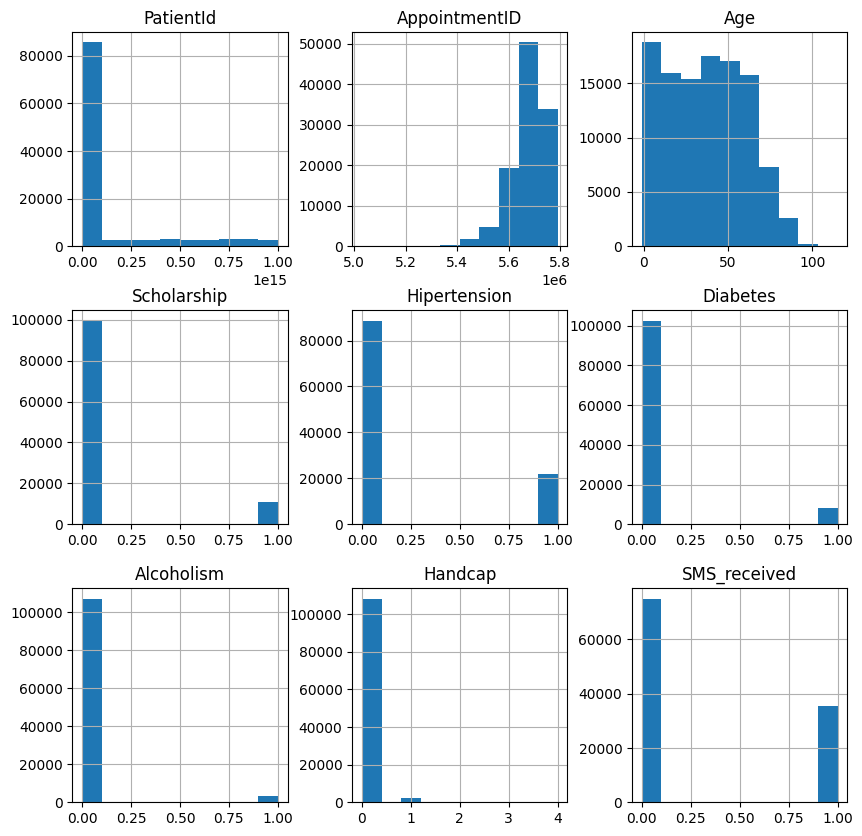

In [12]:
df.hist(figsize=(10,10));

In [13]:
# check for duplicates - there are none
print(df.duplicated().sum())

0


In [14]:
# how many different patients exist in the dataset
df.PatientId.nunique()

62299

In [15]:
# check that AppointmentID is a unique row identifier
df.AppointmentID.nunique()

110527

In [16]:
df['Age'].value_counts()

Age
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: count, Length: 104, dtype: int64

In [19]:
df[df['Age']==0]
# age of -1 is obviously an error, let's change it to 0 in the next section

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÃNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÃNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÃNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÃNCIA,0,0,0,0,0,0,No


In [20]:
df.groupby(['Age', 'PatientId'])['Age'].count()
# there are actually just two patients aged 115, which might be plausible

Age   PatientId   
-1    4.659432e+14    1
 0    2.699191e+08    2
      3.424788e+08    1
      4.279622e+08    1
      1.192462e+09    1
                     ..
 100  5.578313e+13    1
 102  2.342836e+11    1
      9.762948e+14    1
 115  3.196321e+13    4
      7.482346e+14    1
Name: Age, Length: 63467, dtype: int64

In [ ]:
df['Handcap'].value_counts()
# there are a few cases of more than one handicap, so handicap is a categorical variable, 
# where 4 means that a patient has 4 different handicaps

In [21]:
df['Neighbourhood'].value_counts()
# there are 81 places, some of them with large number of appointments, it makes sense to categorize it

Neighbourhood
JARDIM CAMBURI                  7717
MARIA ORTIZ                     5805
RESISTÃNCIA                    4431
JARDIM DA PENHA                 3877
ITARARÃ                        3514
                                ... 
ILHA DO BOI                       35
ILHA DO FRADE                     10
AEROPORTO                          8
ILHAS OCEÃNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                  1
Name: count, Length: 81, dtype: int64

In [22]:
# dropping AppointmentID column
df.drop(['AppointmentID'], axis=1, inplace=True)

In [23]:
# renaming mistyped columns
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'},\
          inplace=True)

# confirm changes
df.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [24]:
# check for duplicates again after dropping ID column
print(df.duplicated().sum())

618


In [25]:
# show some of the duplicates
df_dup = df[df.duplicated()]
df_dup.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
154,1.925263e+10,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÃ,0,0,0,0,0,0,No
369,4.341600e+14,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
371,4.497415e+09,F,2016-04-19T11:16:27Z,2016-04-29T00:00:00Z,11,BELA VISTA,0,0,0,0,0,0,No
466,5.161239e+12,F,2016-04-27T13:16:02Z,2016-04-29T00:00:00Z,49,CONSOLAÃÃO,0,0,0,0,0,0,No
554,4.916356e+12,M,2016-03-29T12:40:26Z,2016-04-29T00:00:00Z,40,CENTRO,0,0,0,0,0,0,Yes


In [26]:
# change Age=-1 to a more realistic Age=0
df['Age'].replace({-1: 0}, inplace=True)

In [27]:
# confirm the change
df['Age'].value_counts()

Age
0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: count, Length: 103, dtype: int64

In [28]:
# change Gender, Neighbourhood, Handicap to categorical data type
for c in ['Gender', 'Neighbourhood', 'Handicap']:
    df[c] = df[c].astype('category')

In [30]:
# change Scholarship, Hypertension, Diabetes, Alcoholism, SMSReceived to bool data type
for c in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMSReceived']:
    df[c] = df[c].astype('bool')

In [31]:
# NoShow column transformation
df['NoShow'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [32]:
# NoShow type change
df['NoShow'] = df['NoShow'].astype('bool')

In [29]:
# day columns data type change
for c in ['ScheduledDay', 'AppointmentDay']:
    df[c] = pd.to_datetime(df[c])

Q1: Which groups of patients show up less for their scheduled appointments?

In [33]:
# countplot function usable in subplots
def count_plot(dfdata, xdata, gxlabel, gylabel, gtitle, gcolor=None, gpalette=None):
    g = sns.countplot(data = dfdata, x = xdata, color = gcolor, palette= gpalette)
    plt.title(gtitle)
    plt.xlabel(gxlabel)
    plt.ylabel(gylabel)
    return g

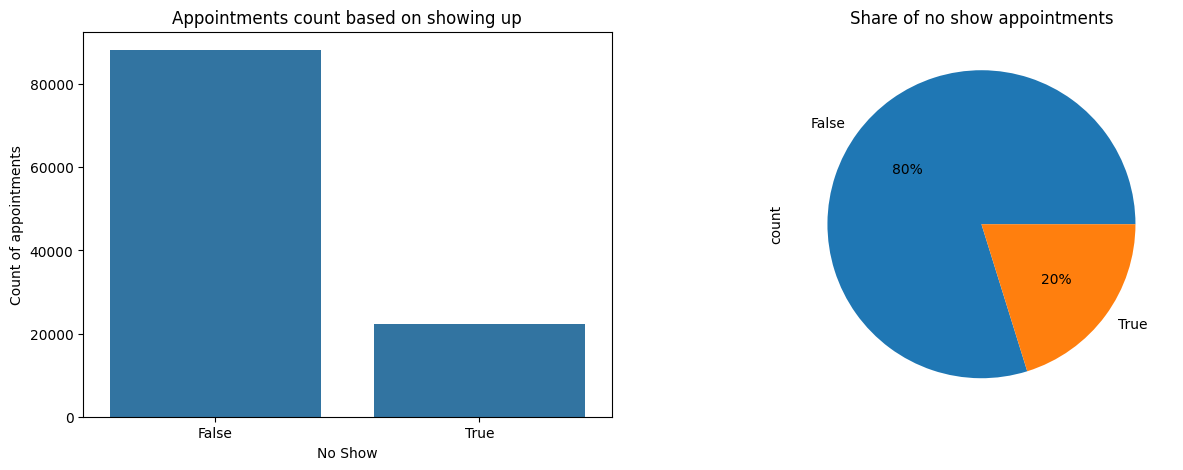

In [34]:
# let's first look at details of individual patient characteristics and of our dependent variable: NoShow

# share of NoShows on all appointments
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
count_plot(df, 'NoShow', 'No Show', 'Count of appointments', 'Appointments count based on showing up')

plt.subplot(1,2,2)
df.NoShow.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Share of no show appointments')
plt.show()

In [35]:
# calculate total counts of no shows in data
noshow_totals = df.groupby('NoShow').count()['Age']
noshow_totals

NoShow
False    88208
True     22319
Name: Age, dtype: int64

In [36]:
# there are 22319 no shows in the data, which makes 20% of all appointments
noshow_proportion = df['NoShow'].sum() / len(df.index)
noshow_proportion

0.20193255946510807

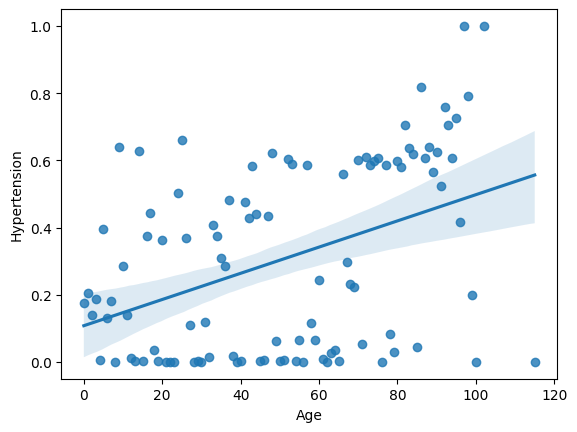

In [48]:
# age hypertension scatter with line fit
# there are more people with hypertension among older patients, as correlation of 0.5 from above suggests
hypertension_mean = df['Hypertension'].groupby(df['Age']).mean()
ages = df['Age'].unique()
sns.regplot(x = ages, y = hypertension_mean)
plt.xlabel('Age')
plt.show()

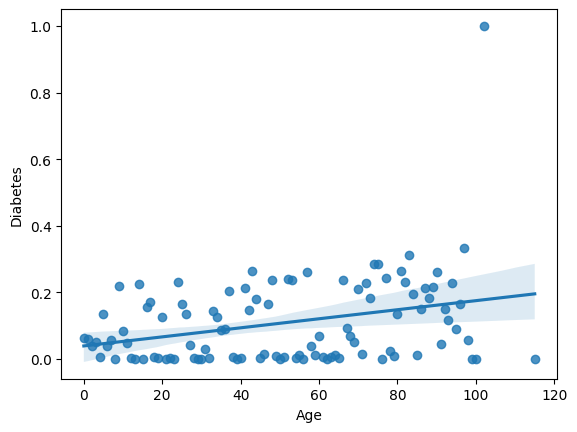

In [49]:
# age diabetes scatter with line fit
# there are more people with diabetes among older patients
diabetes_mean = df['Diabetes'].groupby(df['Age']).mean()
ages = df['Age'].unique()
sns.regplot(x = ages, y = diabetes_mean)
plt.xlabel('Age')
plt.show()

In [50]:
# the outlier is caused by having only one appointment with a patient aged 99 years and this patient is diabetic
df.query('Age >= 99').head(15)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
58014,9.762948e+14,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,False,False,False,False,0,False,False
63912,3.196321e+13,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,True
63915,3.196321e+13,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,True
68127,3.196321e+13,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,True
76284,3.196321e+13,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,False
79270,9.739430e+12,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,False,False,False,False,1,False,False
79272,9.739430e+12,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,False,False,False,False,1,False,False
90372,2.342836e+11,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,False,False,False,False,0,False,False
92084,5.578313e+13,F,2016-05-06 14:55:36+00:00,2016-06-03 00:00:00+00:00,100,ANTÃNIO HONÃRIO,False,False,False,False,0,True,False
97647,3.661577e+10,F,2016-06-06 09:46:34+00:00,2016-06-06 00:00:00+00:00,99,SANTO ANTÃNIO,False,True,True,False,0,False,False


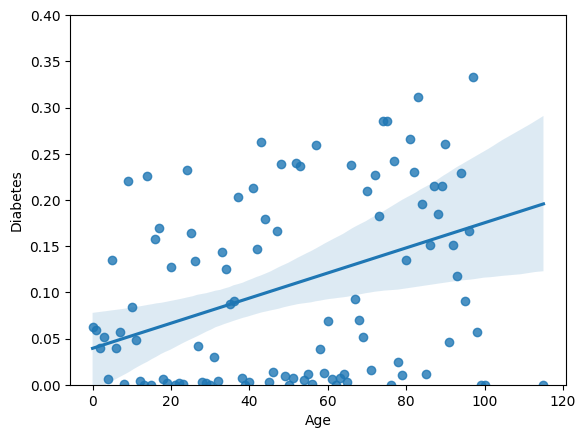

In [51]:
# repeating the above, but cutting out the one outlier appointment to see the correlation better
diabetes_mean = df['Diabetes'].groupby(df['Age']).mean()
ages = df['Age'].unique()
sns.regplot(x = ages, y = diabetes_mean)
plt.xlabel('Age')
plt.ylim(0,0.4)
plt.show()

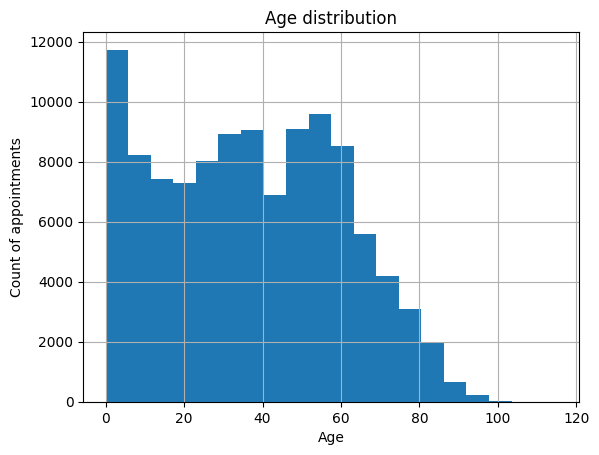

In [52]:
# age distribution
# young people have many appointments, which could be because of a number of mandatory medical visits at that age
g = df.Age.hist(bins=20);
g.set(xlabel = 'Age', ylabel = 'Count of appointments', title = 'Age distribution')
plt.show()

C:\Users\Student\AppData\Local\Temp\ipykernel_22440\4126048759.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)


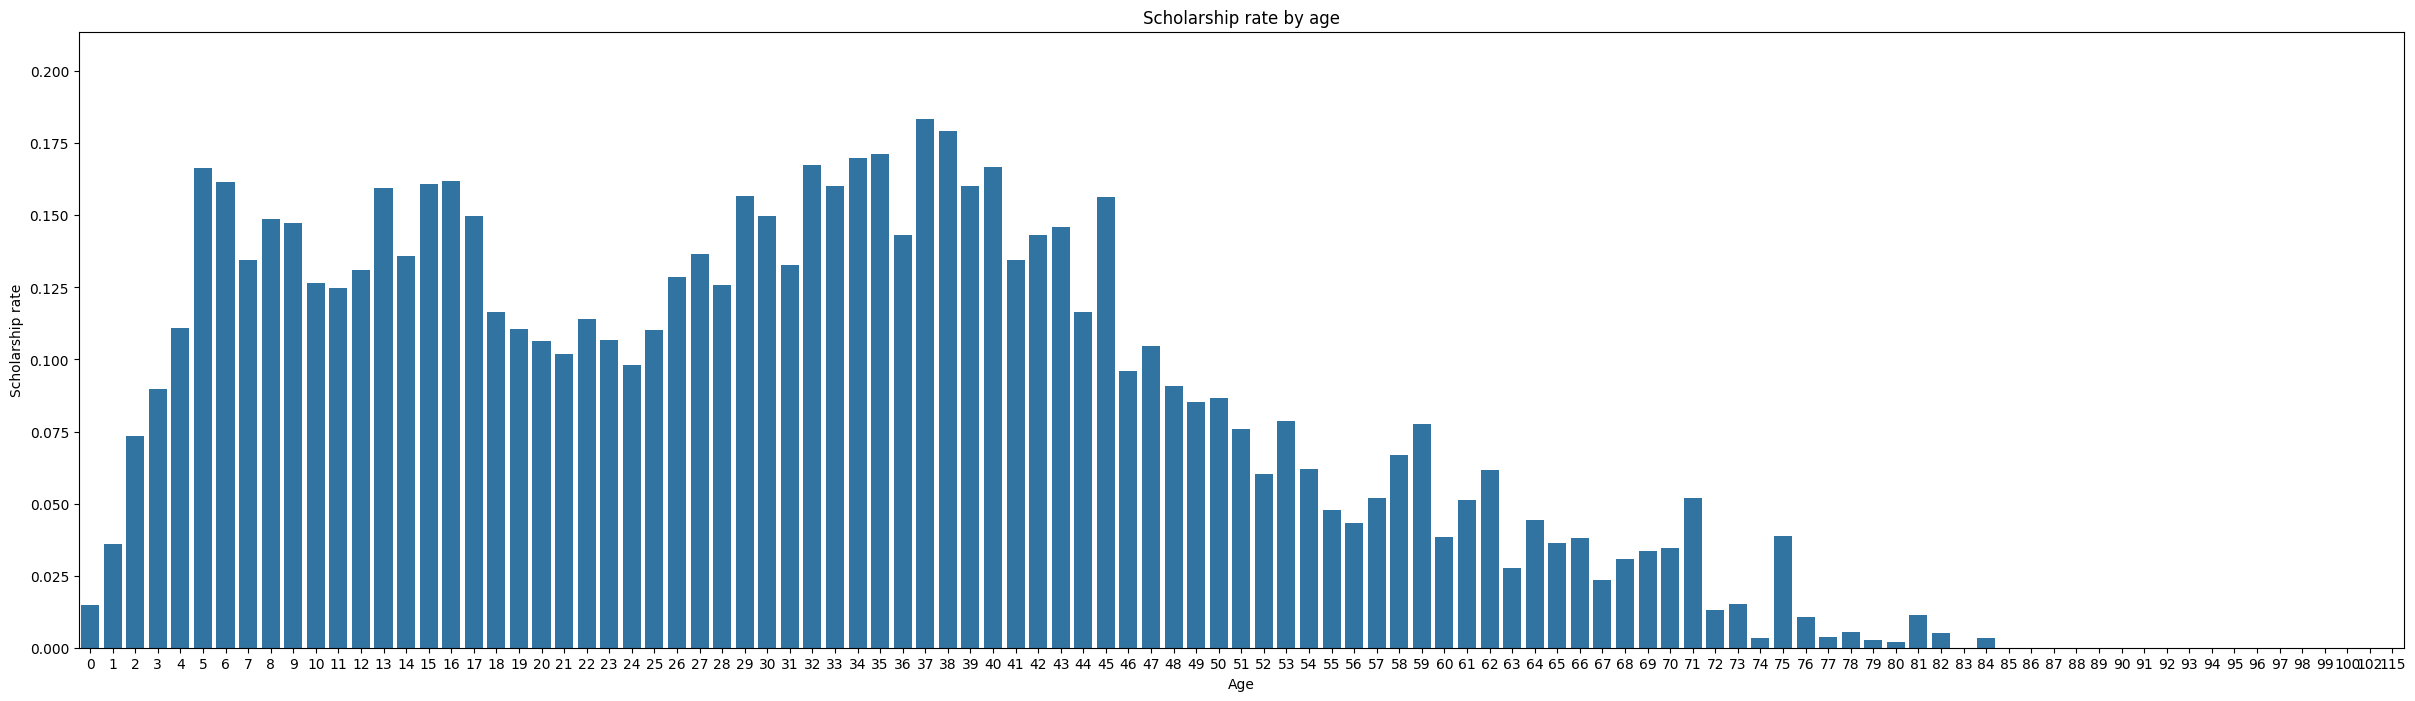

In [54]:
def bar_plot(xdata, ydata, gxlabel, gylabel, gtitle, gerrwidth=None, gpalette=None):
    g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
    g.set(xlabel = gxlabel, ylabel = gylabel, title = gtitle)
    return g
# proportion of appointments of patients on scholarship by age
# it might be the case that scholarship is aimed predominantly at children and parents of children based on the plot
plt.figure(figsize=(30,8))
bar_plot(df['Age'], df['Scholarship'], 'Age', 'Scholarship rate', 'Scholarship rate by age', 0)
plt.show()

C:\Users\Student\AppData\Local\Temp\ipykernel_22440\4126048759.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)


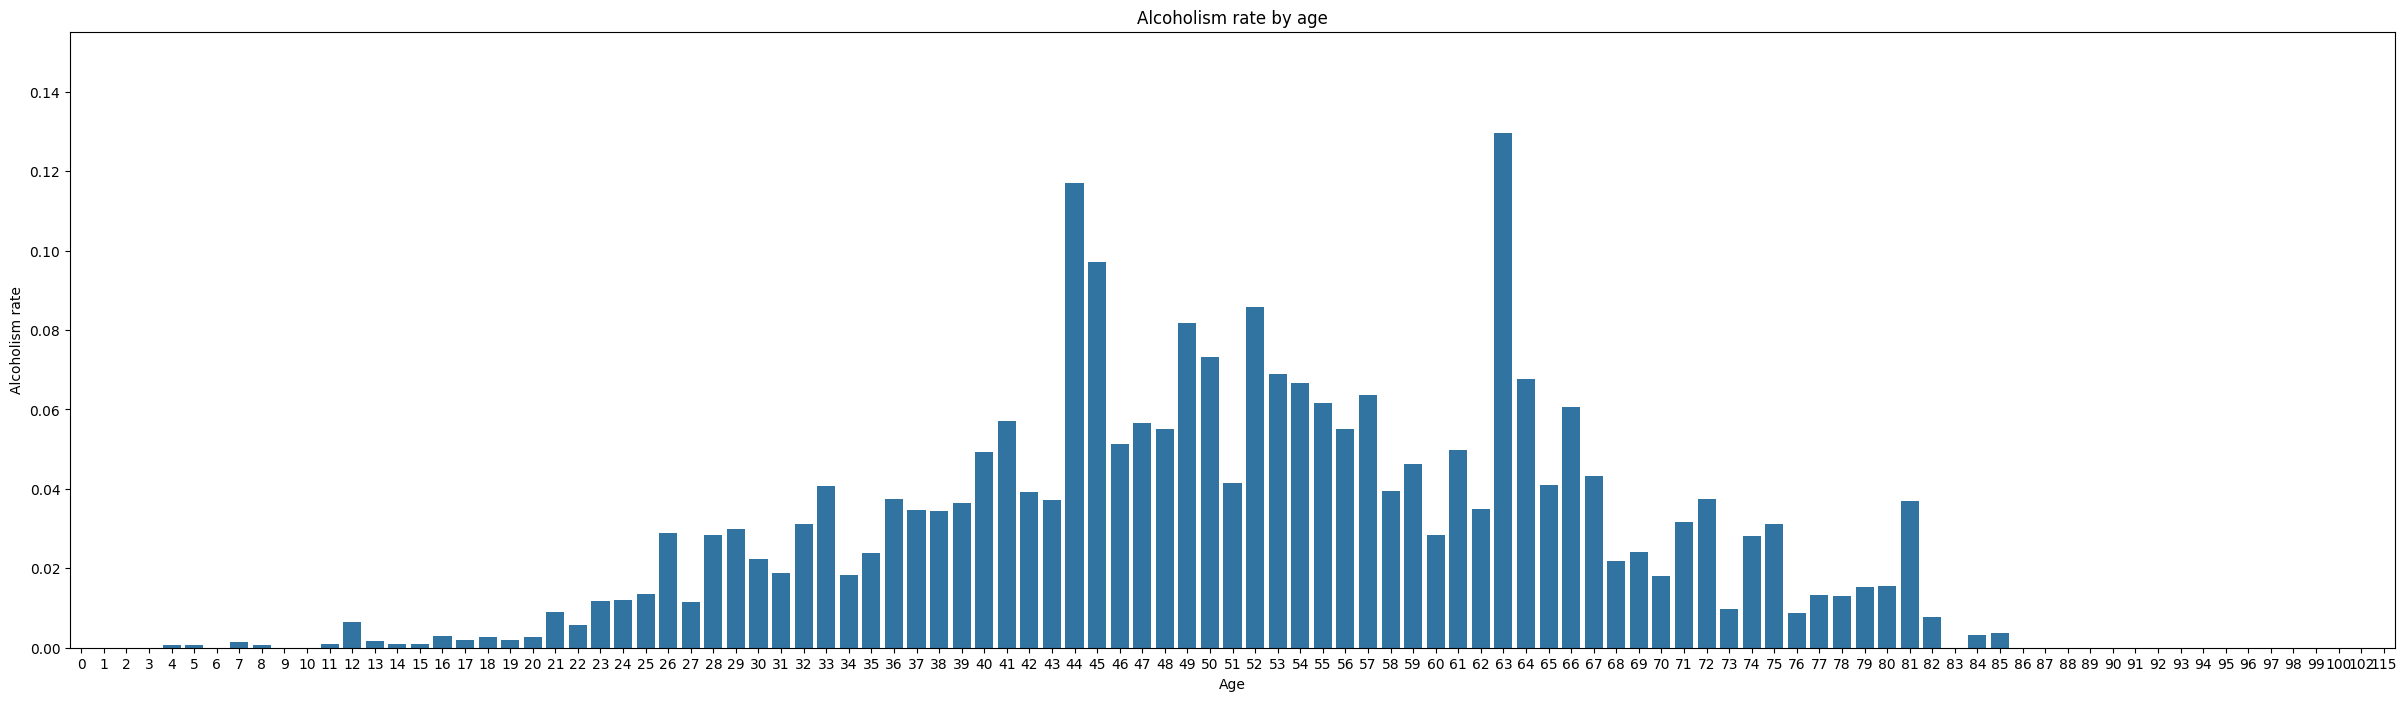

In [55]:
# how alcoholism is distributed among patients scheduling appointments by age
# the most endangered group are patients between their 40s and 60s
plt.figure(figsize=(30,8))
bar_plot(df['Age'], df['Alcoholism'], 'Age', 'Alcoholism rate', 'Alcoholism rate by age', 0)
plt.show()

C:\Users\Student\AppData\Local\Temp\ipykernel_22440\4126048759.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)


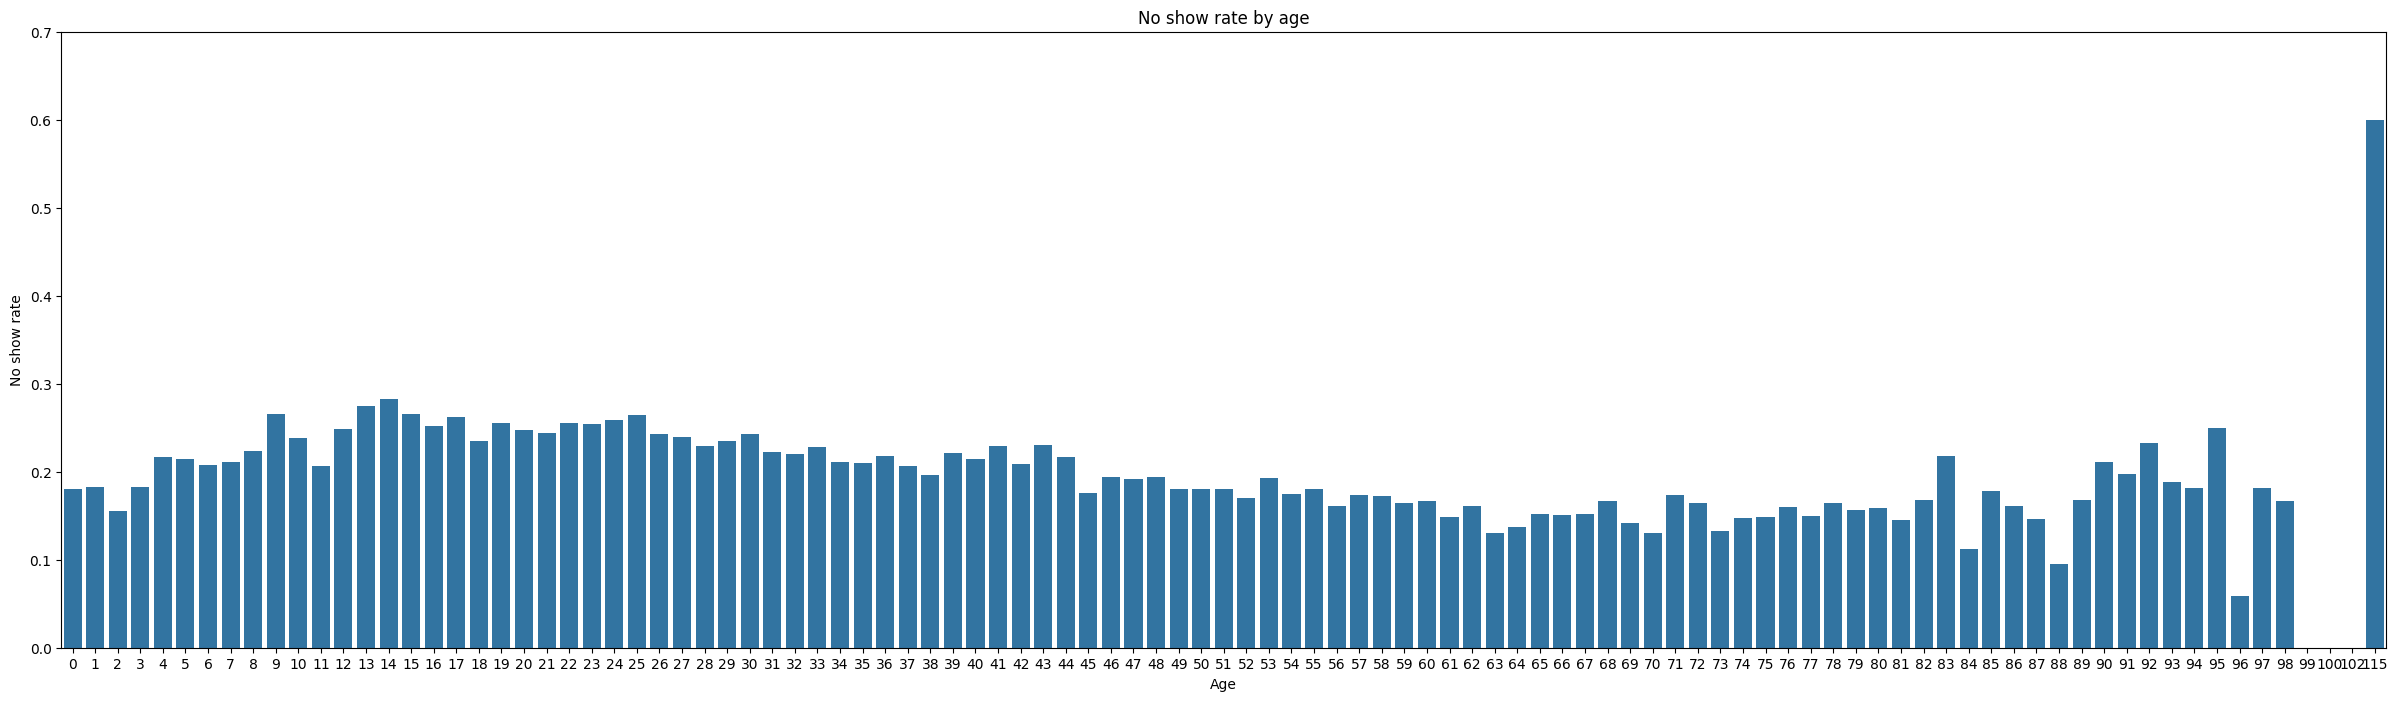

In [56]:
# there seems to be a decreasing no show rate as age increases between ages 15-80
plt.figure(figsize=(30,8))
plt.ylim(0,0.7)
bar_plot(df['Age'], df['NoShow'], 'Age', 'No show rate', 'No show rate by age', 0)
plt.show()

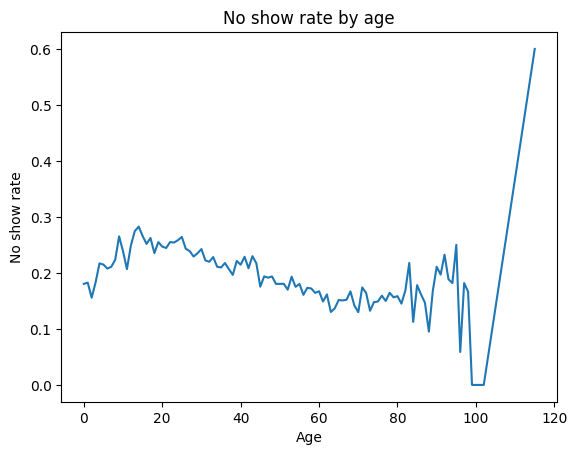

In [57]:
# the above is also confirmed by the following plot
# there are fewer data points for ages higher than 90 (check histogram above), that is why the upper end is so volatile
y_means = df['NoShow'].groupby(df['Age']).mean()
x_age = df['Age'].unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_means)
plt.title('No show rate by age')
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.show()

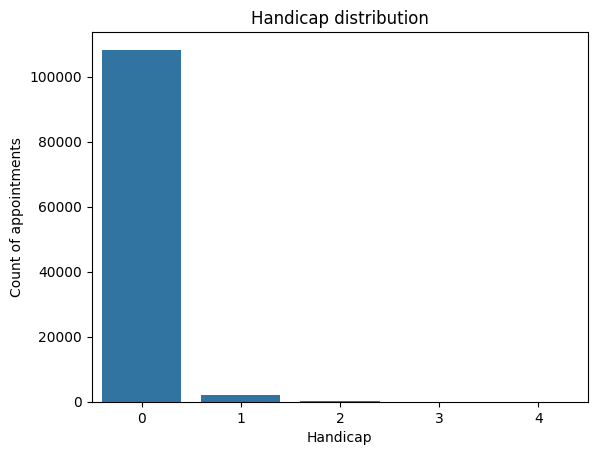

In [58]:
# most appointments are made by patients with no handicap
count_plot(df, 'Handicap', 'Handicap', 'Count of appointments', 'Handicap distribution', sns.color_palette()[0])
plt.show()

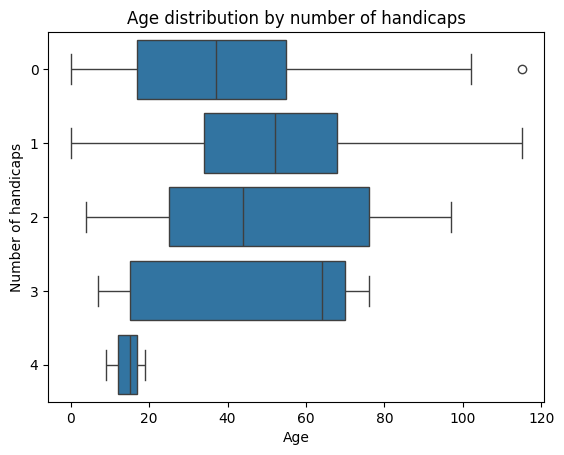

In [59]:
# age distribution for different handicap groups
# age distribution of patients with 4 handicaps is very different because we only have a very small sample of these patients
g = sns.boxplot(data = df, x = 'Age', y = 'Handicap')
g.set(xlabel='Age', ylabel='Number of handicaps', title='Age distribution by number of handicaps')
plt.show()

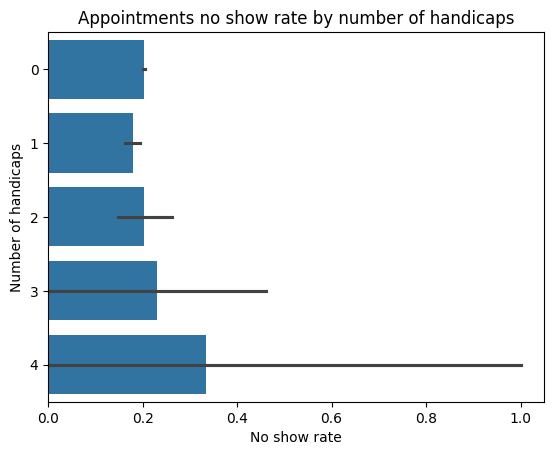

In [60]:
# number of handicaps does not make much of a difference in showing up
# (we can disregard 3 and 4 handicaps because there are just a few data points, as is suggested by the large error bars and distribution chart above)
g = sns.barplot(x = df['NoShow'], y = df['Handicap'])
g.set(xlabel='No show rate', ylabel='Number of handicaps', title='Appointments no show rate by number of handicaps')
plt.show()

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning

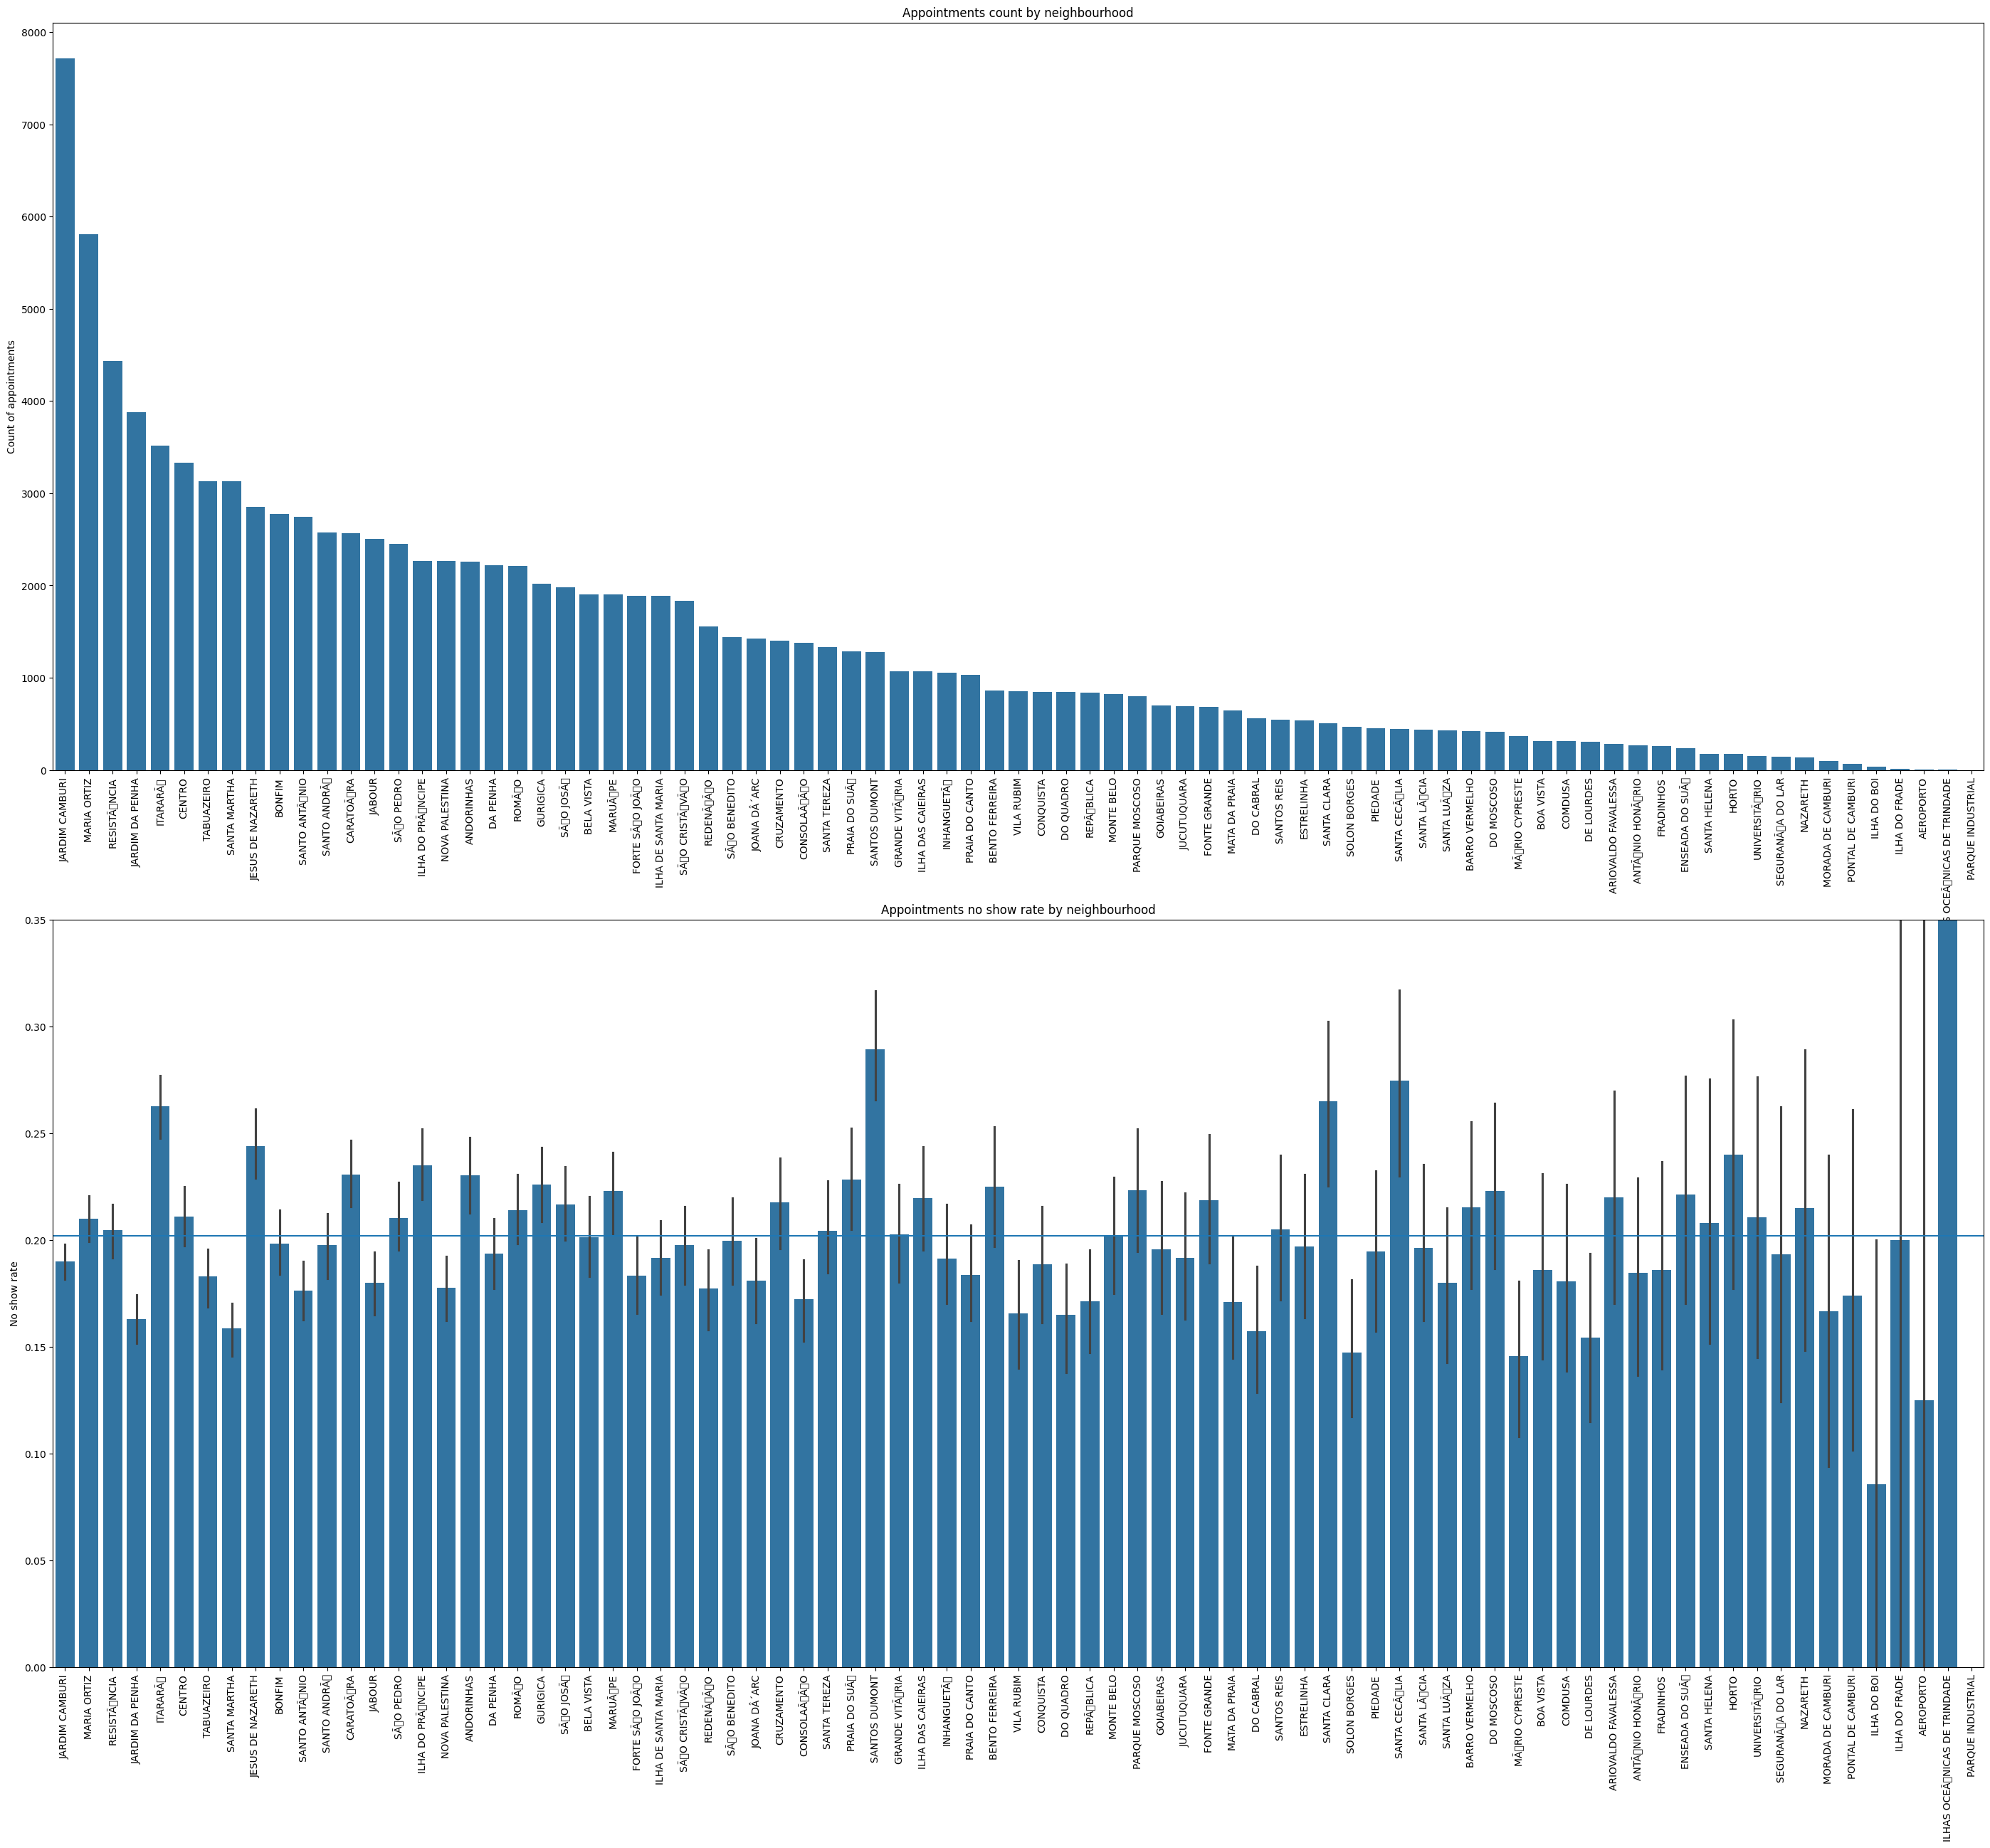

In [61]:
# share of neighbourhoods
# there are a couple of very large neighbourhoods by a number of appointments
plt.figure(figsize=(35,30))

plt.subplot(2, 1, 1)
plt.xticks(rotation=90)
g = sns.countplot(data = df, x = 'Neighbourhood', order = df['Neighbourhood'].value_counts().index, \
                  color=sns.color_palette()[0])
g.set(ylabel = 'Count of appointments', title = 'Appointments count by neighbourhood')

# neighbourhoods do not deviate widely from the overall 20% no show rate
plt.subplot(2, 1, 2)
plt.xticks(rotation=90)
g = sns.barplot(x = df['Neighbourhood'], y = df['NoShow'], order = df['Neighbourhood'].value_counts().index, \
                color=sns.color_palette()[0]);
g.set_title('Appointments no show rate by neighbourhood')
g.set(ylabel='No show rate', ylim=(0,0.35), xlabel='')
g.axhline(noshow_proportion)

plt.show()

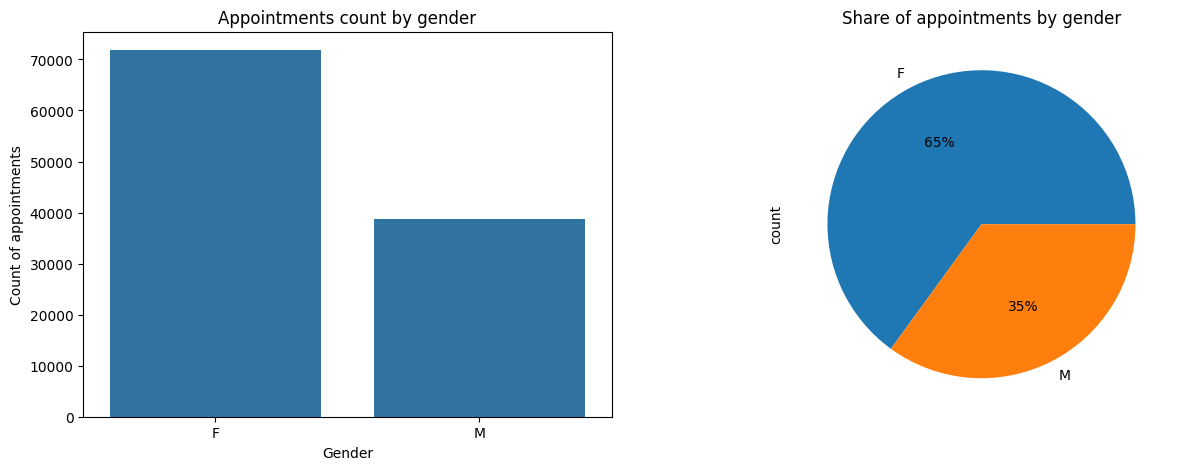

In [62]:
# there are more females scheduling appointments

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
count_plot(df, 'Gender', 'Gender', 'Count of appointments', 'Appointments count by gender')

plt.subplot(1,2,2)
g2 = df.Gender.value_counts().plot(kind='pie',autopct='%1.0f%%')
g2.set(title = 'Share of appointments by gender')

plt.show()

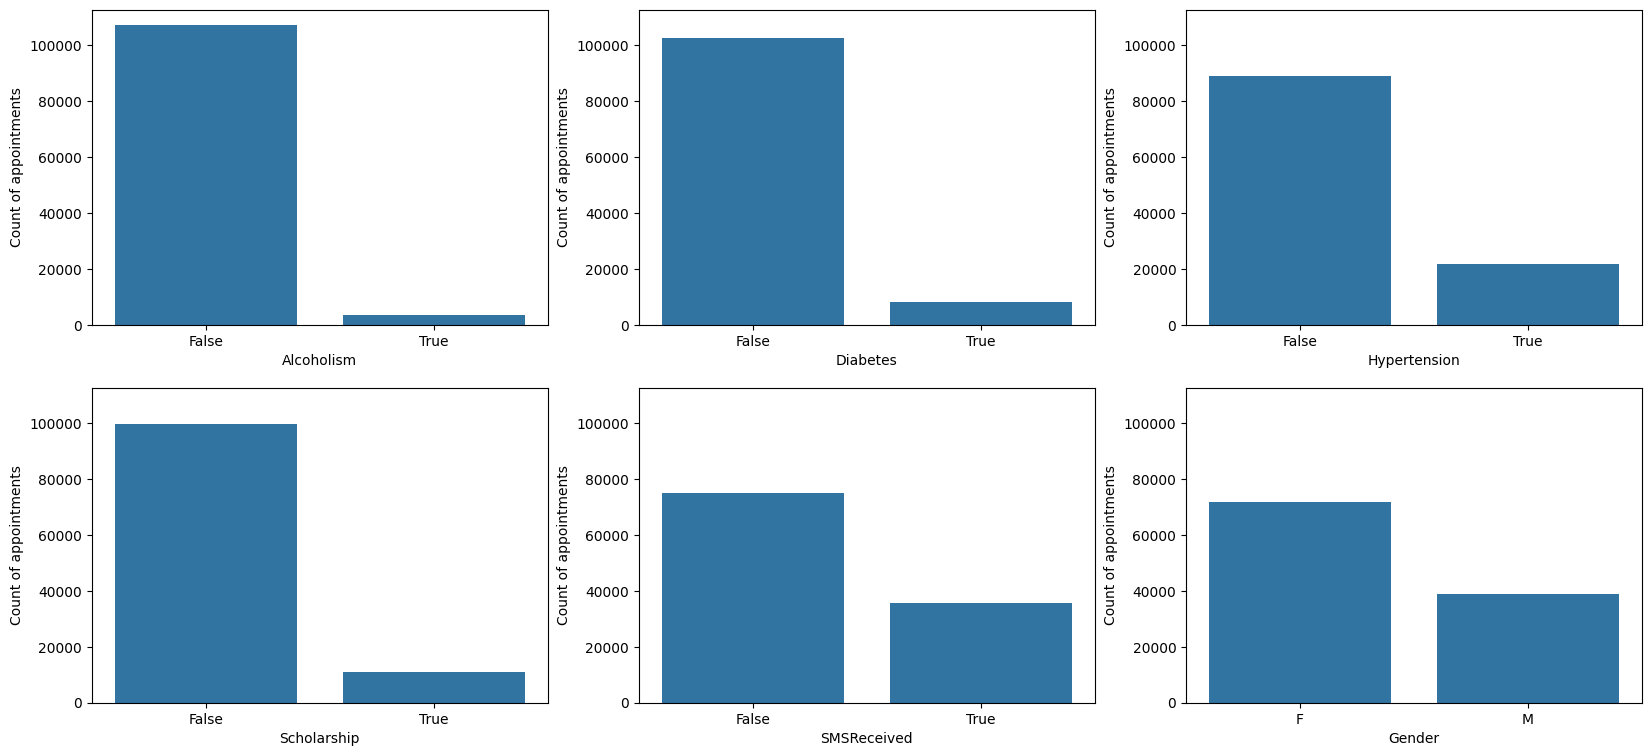

In [63]:
# subplots with amounts of appointments per characteristic value
plt.figure(figsize = [20, 9])

plt.subplot(2, 3, 1)
g1 = count_plot(df, 'Alcoholism', 'Alcoholism', 'Count of appointments', '')

plt.subplot(2, 3, 2)
count_plot(df, 'Diabetes', 'Diabetes', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 3)
count_plot(df, 'Hypertension', 'Hypertension', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 4)
count_plot(df, 'Scholarship', 'Scholarship', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 5)
count_plot(df, 'SMSReceived', 'SMSReceived', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 6)
count_plot(df, 'Gender', 'Gender', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.show()

In [65]:
# plot details function to be used in the following bar charts
def plot_details(plot):
    plot.set(ylim=(0,0.3))
    plot.axhline(noshow_proportion, color='black')
    plt.ylim(g1.get_ylim())

C:\Users\Student\AppData\Local\Temp\ipykernel_22440\4126048759.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
C:\Users\Student\AppData\Local\Temp\ipykernel_22440\4126048759.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
C:\Users\Student\AppData\Local\Temp\ipykernel_22440\4126048759.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
C:\Users\Student\AppData\Local\Temp\ipykernel_22440\4126048759.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15

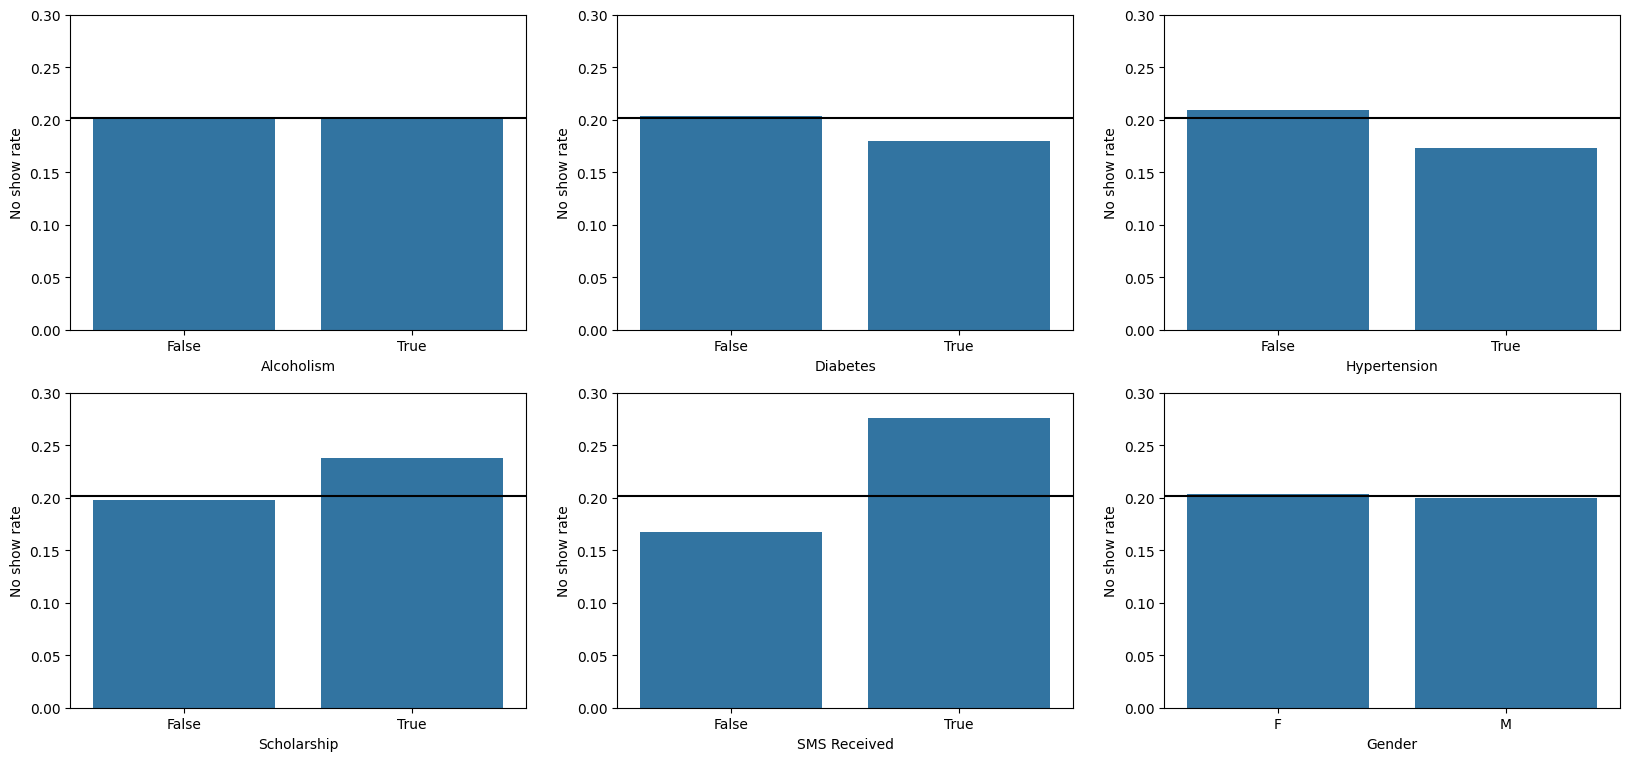

In [66]:
# subplots with no show rates per characteristic
# the overall no show rate is shown by a horizontal line
plt.figure(figsize = [20, 9])

plt.subplot(2, 3, 1)
g1 = bar_plot(df['Alcoholism'], df['NoShow'], 'Alcoholism', 'No show rate', '', 0)
plot_details(g1)

plt.subplot(2, 3, 2)
g2 = bar_plot(df['Diabetes'], df['NoShow'], 'Diabetes', 'No show rate', '', 0)
plot_details(g2)

plt.subplot(2, 3, 3)
g3 = bar_plot(df['Hypertension'], df['NoShow'], 'Hypertension', 'No show rate', '', 0)
plot_details(g3)

plt.subplot(2, 3, 4)
g4 = bar_plot(df['Scholarship'], df['NoShow'], 'Scholarship', 'No show rate', '', 0)
plot_details(g4)

plt.subplot(2, 3, 5)
g5 = bar_plot(df['SMSReceived'], df['NoShow'], 'SMS Received', 'No show rate', '', 0)
plot_details(g5)

plt.subplot(2, 3, 6)
g6 = bar_plot(df['Gender'], df['NoShow'], 'Gender', 'No show rate', '', 0)
plot_details(g6)

plt.show()

Q2: Does it matter how long in advance the appointments are being scheduled for the future no-show share?

In [67]:
# count number of days between appointment scheduled day and appointment day
datediff = df['AppointmentDay'] - df['ScheduledDay']
datediff = pd.to_timedelta(datediff,'D')
datediff.describe()

count                        110527
mean      9 days 17:08:34.161960425
std      15 days 05:51:27.891504122
min               -7 days +10:10:40
25%        -1 days +15:41:31.500000
50%                 3 days 11:22:18
75%         14 days 07:41:34.500000
max               178 days 13:19:01
dtype: object

In [68]:
# extract just days from the calculated difference
datediff = round(datediff / np.timedelta64(1, 'D')).astype('int')

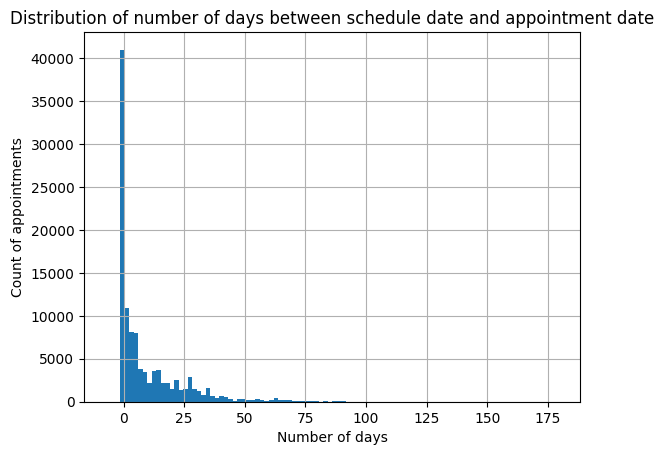

In [69]:
# distribution of date differences - there are many appointments with schedule and appointment at the same day, 
# which means that patients are probably not scheduling in advance
# this would suggest that no shows for day difference equal to 0 should be close to 0%, let's look into it below
datediff.hist(bins=100)
plt.xlabel('Number of days')
plt.ylabel('Count of appointments')
plt.title('Distribution of number of days between schedule date and appointment date')
plt.show()

In [70]:
# merge datediff to df
df['DateDiff'] = datediff
# there are 12161 appointments with negative day difference
len(df.query('DateDiff < 0'))
# almost all of these have difference of -1
len(df.query('DateDiff == -1'))
# this is the case because when the appointment happens on the same date as it is scheduled, the scheduled day includes time, 
# but the appointment date does NOT
# these should therefore be changed to diff = 0
df.query('DateDiff < 0').head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,False,-1
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,False,-1
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,False,-1
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,-1
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,False,-1


In [71]:
# let's change these remaining 3 negative cases to 0, too
df.query('DateDiff < -1').head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff
55226,7.896294e+12,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÃNIO,False,False,False,False,1,False,True,-2
64175,2.425226e+13,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÃÃO,False,False,False,False,0,False,True,-2
71533,9.982316e+14,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÃNIO,False,False,False,False,0,False,True,-7


In [73]:
# change negative differences to 0 because they must be errors
df['DateDiff'] = df['DateDiff'].clip(lower=0)
# check DateDiff summary 
df['DateDiff'].describe()

count    110527.000000
mean          9.913397
std          15.163468
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         179.000000
Name: DateDiff, dtype: float64

C:\Users\Student\AppData\Local\Temp\ipykernel_22440\4126048759.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': None}` instead.

  g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)


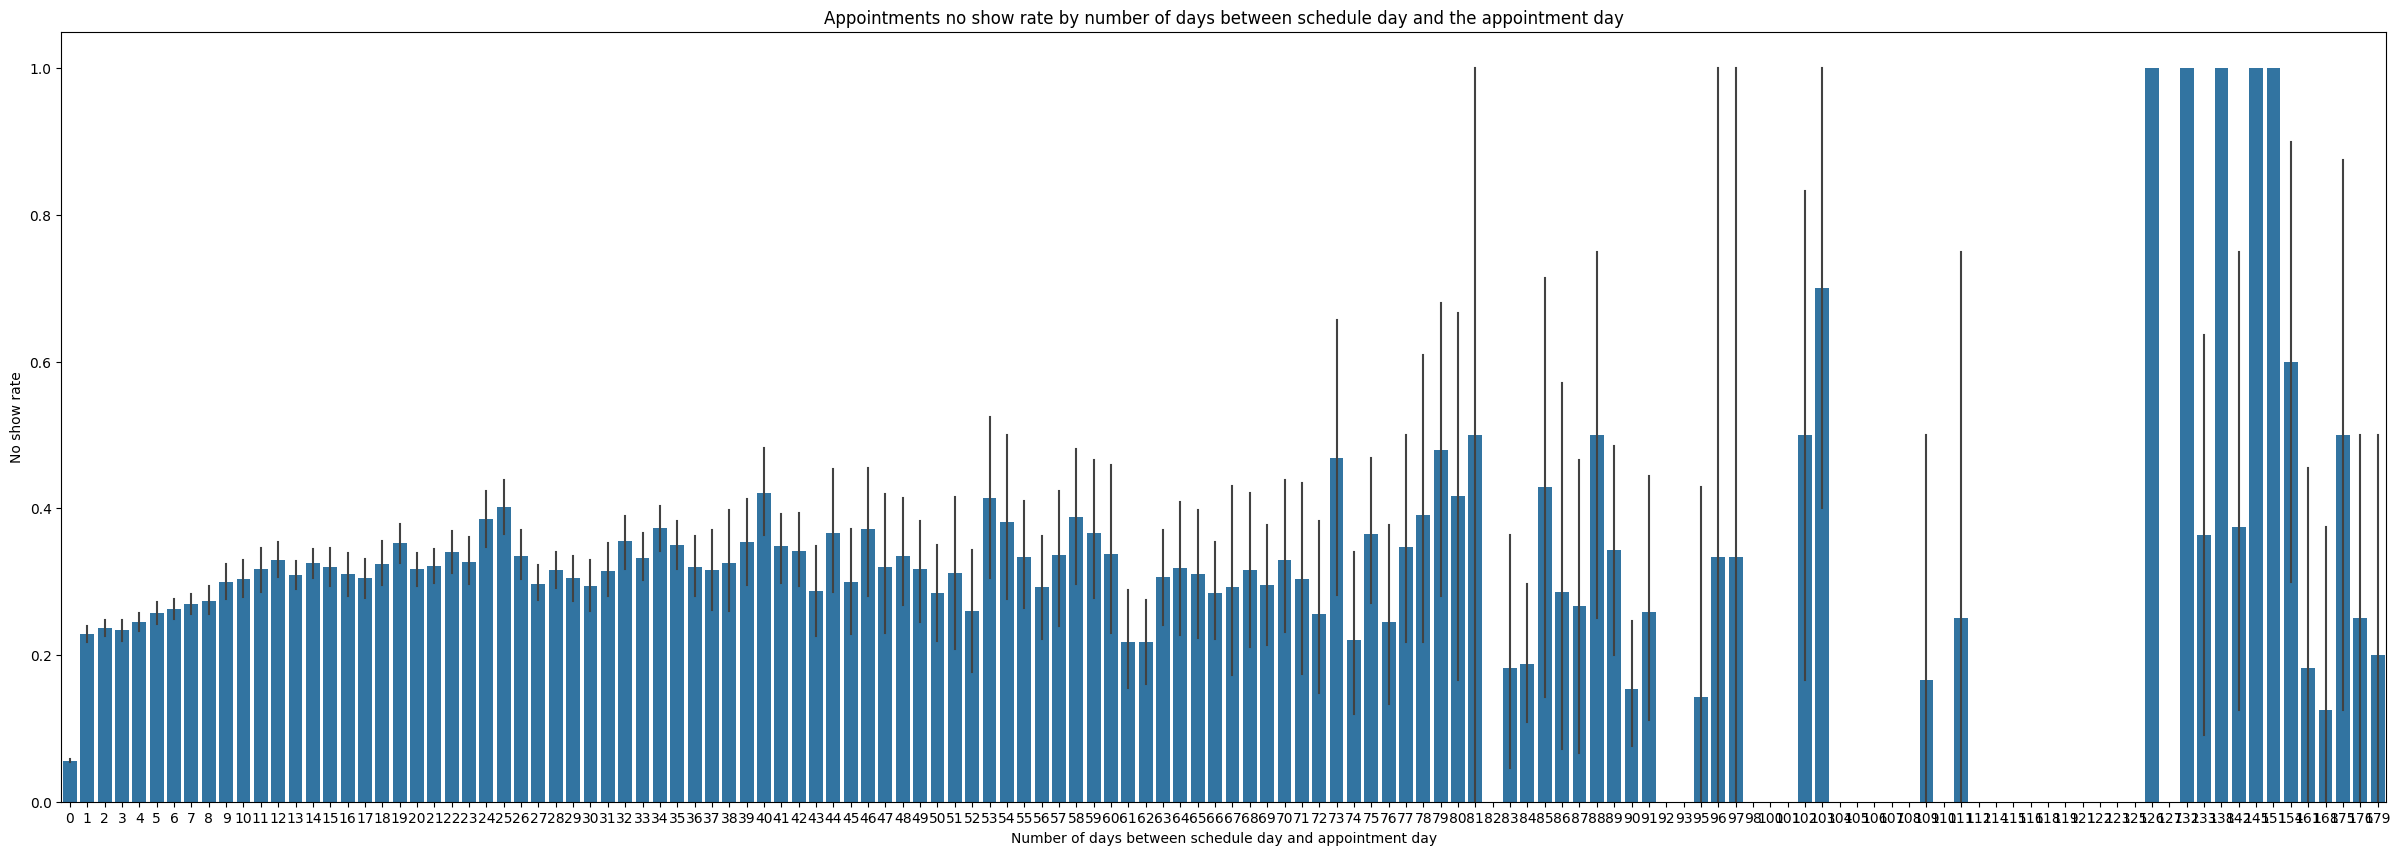

In [74]:
plt.figure(figsize=(30,10))
bar_plot(df['DateDiff'], df['NoShow'], 'Number of days between schedule day and appointment day', 'No show rate', \
         'Appointments no show rate by number of days between schedule day and the appointment day')
plt.show()

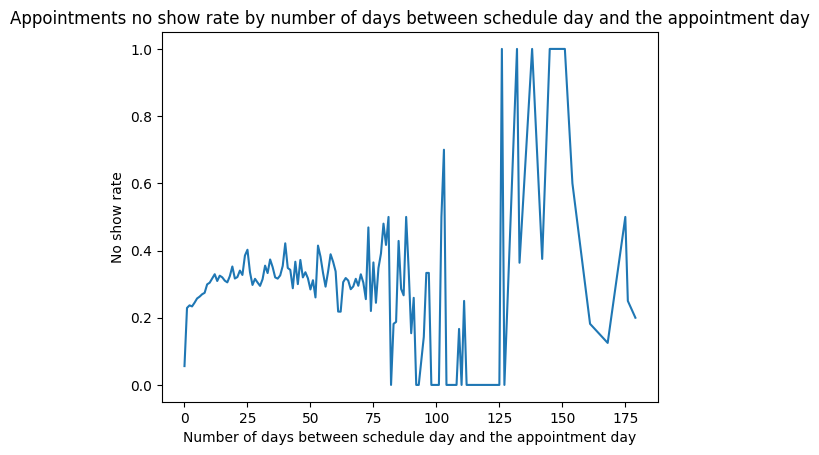

In [75]:
# there are generally fewer data points for date diff higher than 50 (we know that from the histogram higher up),
# that is why the upper end is so volatile
y_means = df['NoShow'].groupby(df['DateDiff']).mean()
x_datediff = df['DateDiff'].unique()
x_datediff = sorted(x_datediff)
plt.errorbar(x = x_datediff, y = y_means)
plt.title('Appointments no show rate by number of days between schedule day and the appointment day')
plt.xlabel('Number of days between schedule day and the appointment day')
plt.ylabel('No show rate')
plt.show()

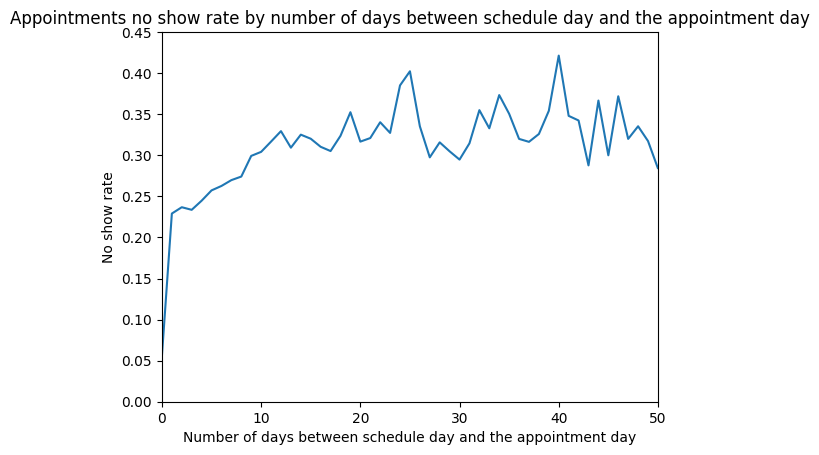

In [76]:
# looking more closely to the relevant part to see the pattern
y_means = df['NoShow'].groupby(df['DateDiff']).mean()
x_datediff = df['DateDiff'].unique()
x_datediff = sorted(x_datediff)
plt.errorbar(x = x_datediff, y = y_means)
plt.title('Appointments no show rate by number of days between schedule day and the appointment day')
plt.xlabel('Number of days between schedule day and the appointment day')
plt.ylabel('No show rate')
plt.xlim(0,50)
plt.ylim(0,0.45)
plt.show()

In [77]:
# filter 0 diff days out of the data frame
df2 = df.query('DateDiff > 0')
df2.shape

(69555, 14)

In [78]:
# overall no show rate of the shrinked data set is 28.8%
noshow_proportion = df2['NoShow'].sum() / len(df2.index)
noshow_proportion

0.2878729063331177

C:\Users\Student\AppData\Local\Temp\ipykernel_22440\4126048759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
C:\Users\Student\AppData\Local\Temp\ipykernel_22440\4126048759.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
C:\Users\Student\AppData\Local\Temp\ipykernel_22440\4126048759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
C:\Users\Student\AppData\Local\Temp\ipykernel_2244

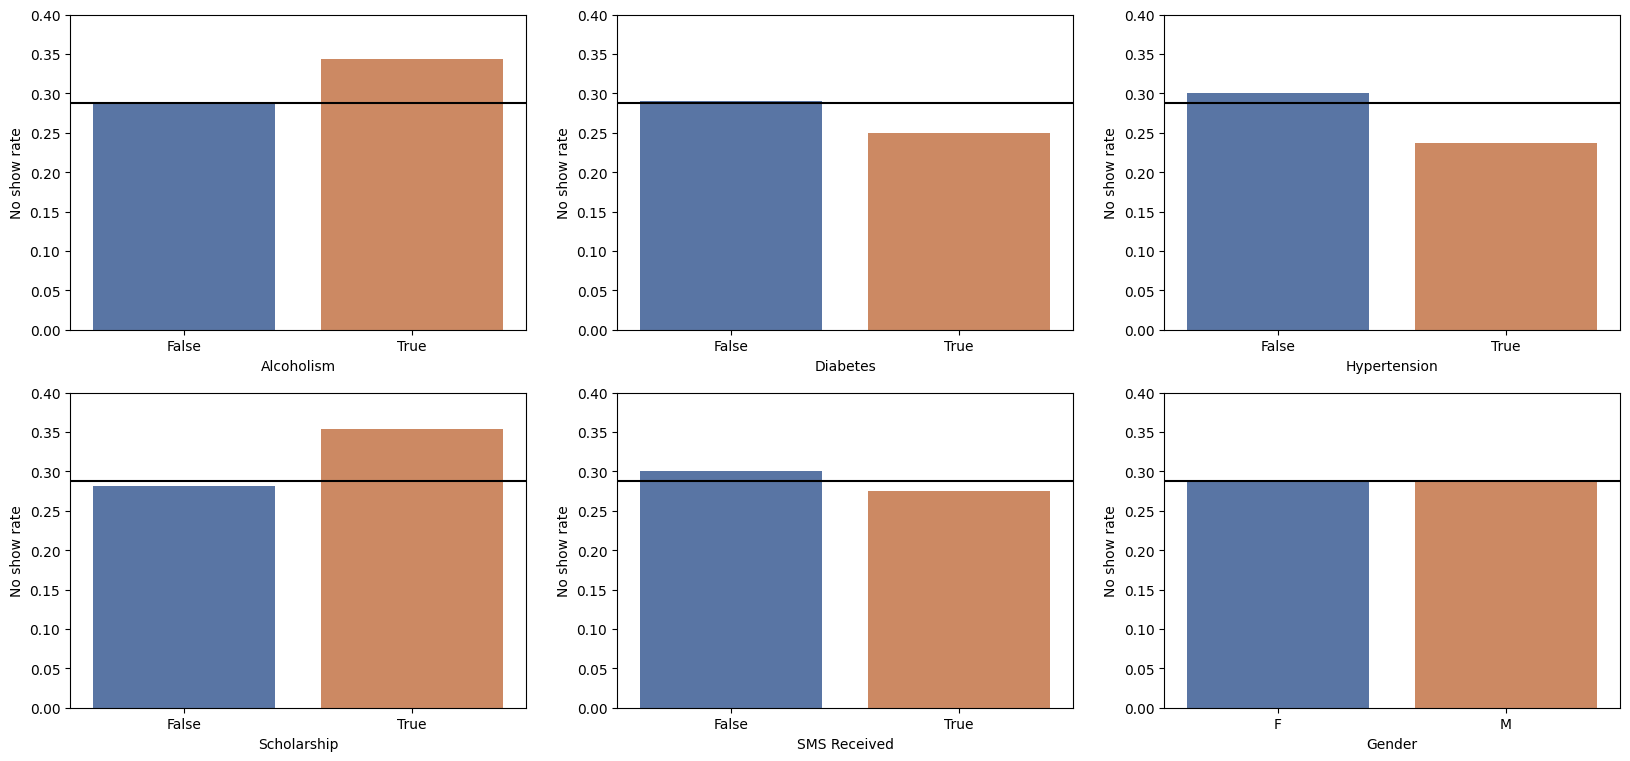

In [79]:
# subplots with no show rates per characteristic
# the overall no show rate is shown by a horizontal line
plt.figure(figsize = [20, 9])

# plot details function to be used in the following bar charts
def plot_details2(plot):
    plot.set(ylim=(0,0.4))
    plot.axhline(noshow_proportion, color='black')
    plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 1)
g1 = bar_plot(df2['Alcoholism'], df2['NoShow'], 'Alcoholism', 'No show rate', '', 0, 'deep')
plot_details2(g1)

plt.subplot(2, 3, 2)
g2 = bar_plot(df2['Diabetes'], df2['NoShow'], 'Diabetes', 'No show rate', '', 0, 'deep')
plot_details2(g2)

plt.subplot(2, 3, 3)
g3 = bar_plot(df2['Hypertension'], df2['NoShow'], 'Hypertension', 'No show rate', '', 0, 'deep')
plot_details2(g3)

plt.subplot(2, 3, 4)
g4 = bar_plot(df2['Scholarship'], df2['NoShow'], 'Scholarship', 'No show rate', '', 0, 'deep')
plot_details2(g4)

plt.subplot(2, 3, 5)
g5 = bar_plot(df2['SMSReceived'], df2['NoShow'], 'SMS Received', 'No show rate', '', 0, 'deep')
plot_details2(g5)

plt.subplot(2, 3, 6)
g6 = bar_plot(df2['Gender'], df2['NoShow'], 'Gender', 'No show rate', '', 0, 'deep')
plot_details2(g6)

plt.show()

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning

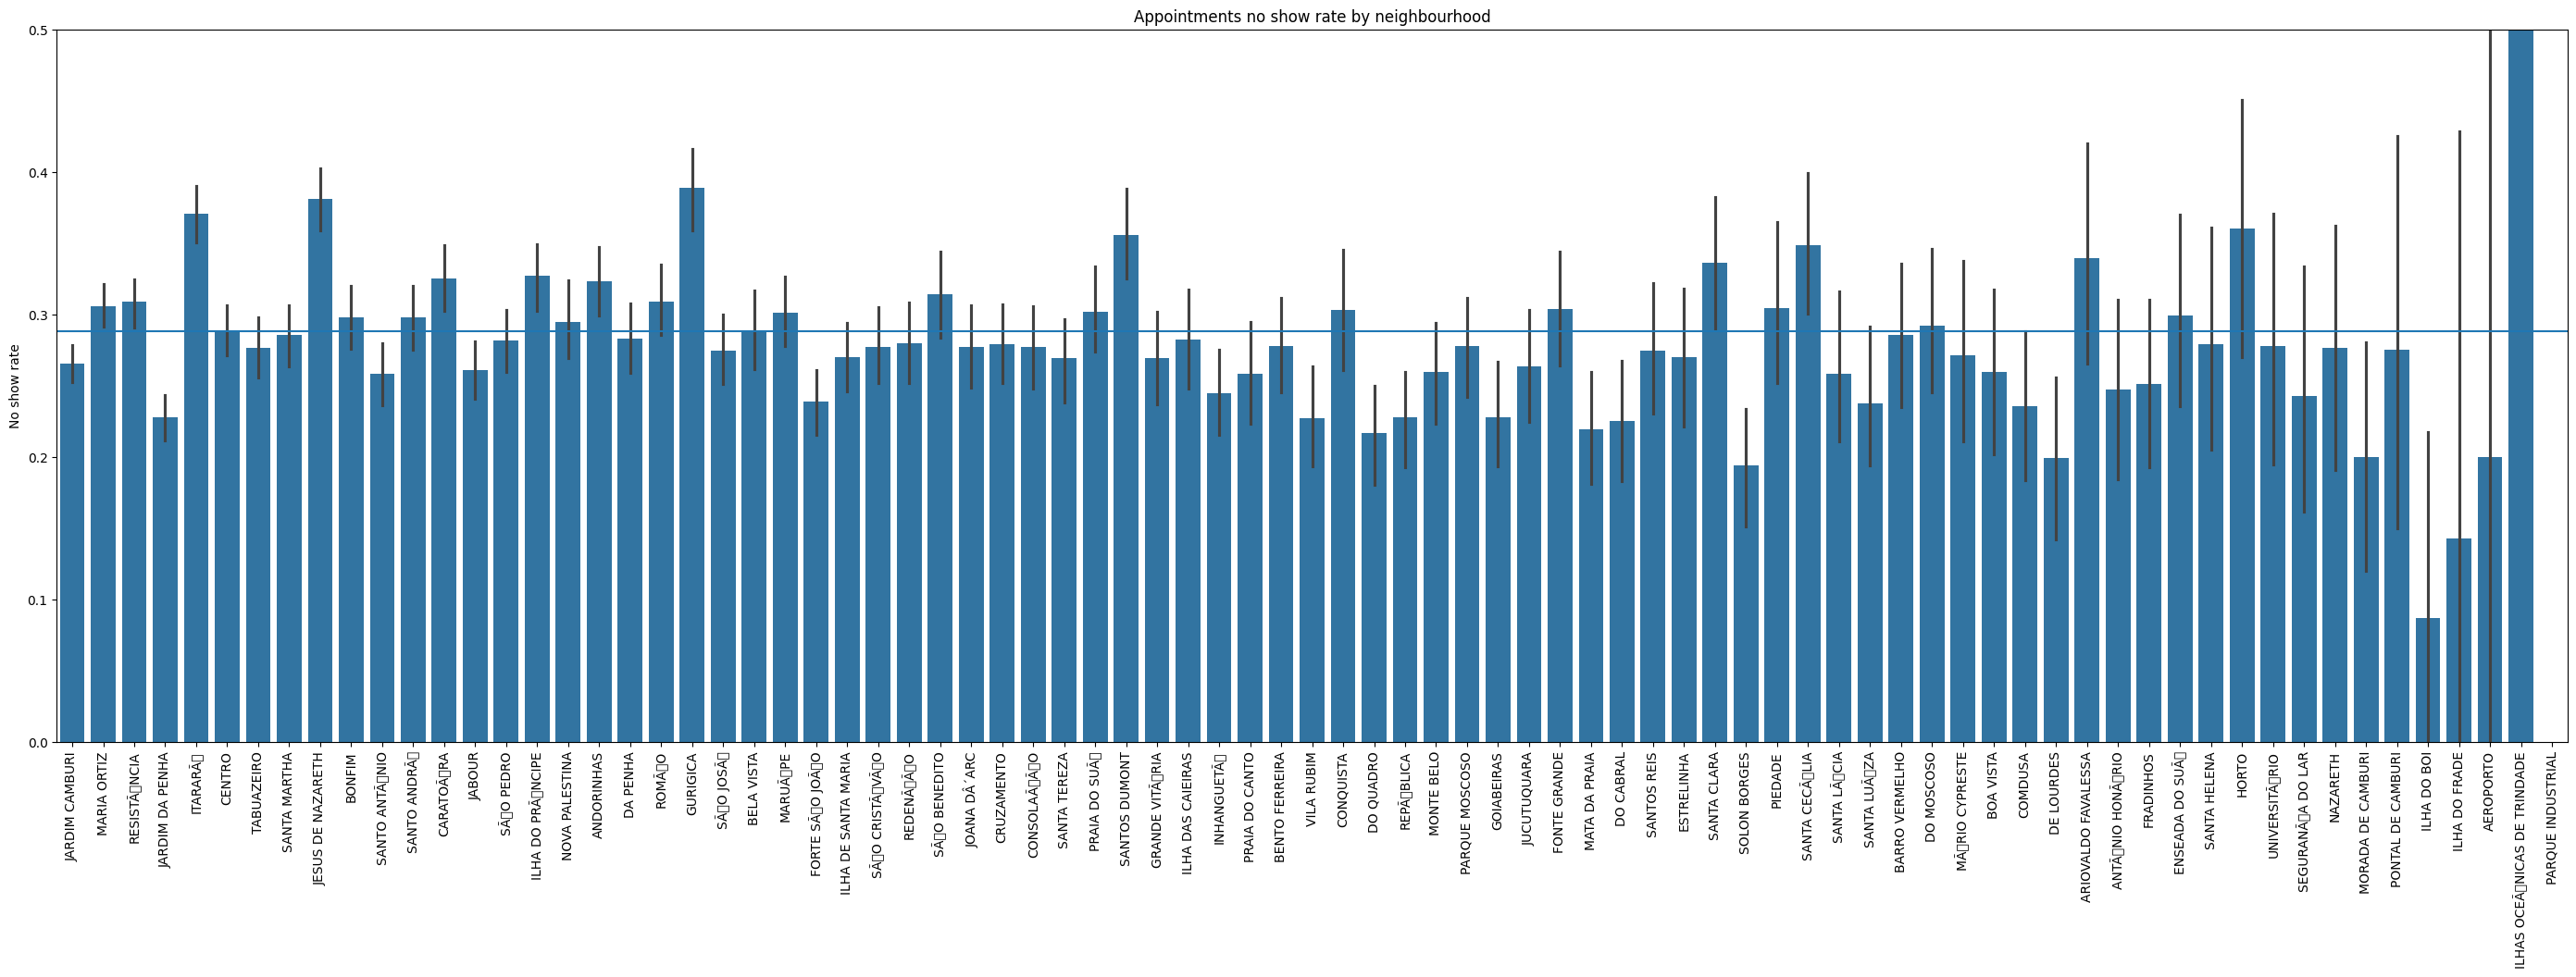

In [80]:
# neighbourhoods still do not deviate widely from the overall no show rate
plt.figure(figsize=(35,10))
plt.xticks(rotation=90)
g = sns.barplot(x = df2['Neighbourhood'], y = df2['NoShow'], order = df['Neighbourhood'].value_counts().index, \
                color=sns.color_palette()[0]);
g.set_title('Appointments no show rate by neighbourhood')
g.set(ylabel='No show rate', ylim=(0,0.5), xlabel='')
g.axhline(noshow_proportion)

plt.show()

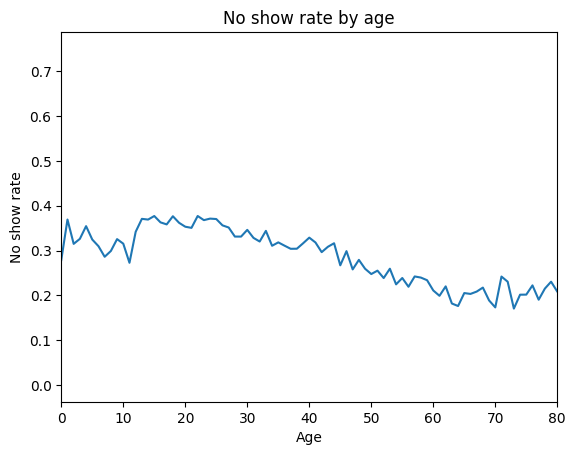

In [81]:
# no show rate still decreases with age in the filtered data
y_means = df2['NoShow'].groupby(df2['Age']).mean()
x_age = df2['Age'].unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_means)
plt.title('No show rate by age')
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.xlim(0,80)
plt.show()

Q3: Are no shows more frequent on Fridays (before the weekend)?

In [82]:
# add appointment day of week to data frame
dow = df2['AppointmentDay'].dt.day_name()
df2 = df2.assign(AppointmentDayOfWeek = dow)
df2.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff,AppointmentDayOfWeek
5,9.598513e+13,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÃBLICA,False,True,False,False,0,False,False,2,Friday
6,7.336882e+14,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,0,False,True,1,Friday
7,3.449833e+12,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,False,False,False,False,0,False,True,1,Friday
9,7.812456e+13,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,False,False,False,False,0,False,False,1,Friday
10,7.345362e+14,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,False,False,False,False,0,False,False,1,Friday


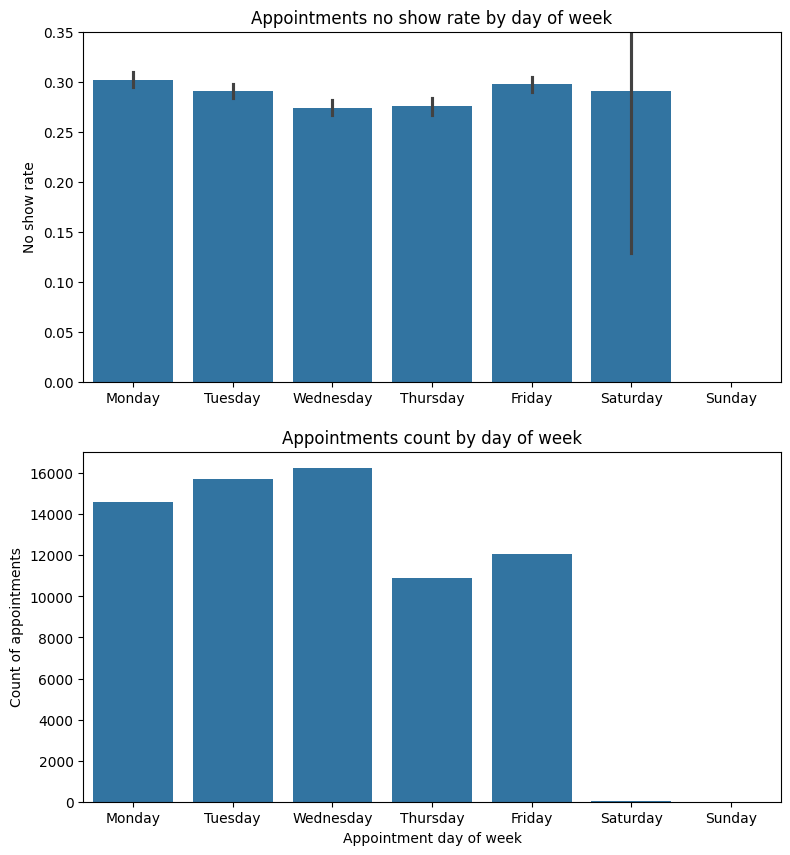

In [83]:
week_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = [9, 10])

plt.subplot(2, 1, 1)
g1 = sns.barplot(x = df2['AppointmentDayOfWeek'], y = df2['NoShow'], order = week_key)
g1.set(xlabel='', ylabel='No show rate', ylim=(0,0.35), title='Appointments no show rate by day of week')

plt.subplot(2, 1, 2)
g2 = sns.countplot(data = df2, x = 'AppointmentDayOfWeek', order = week_key)
g2.set(xlabel='Appointment day of week', ylabel='Count of appointments', title='Appointments count by day of week')

plt.show()

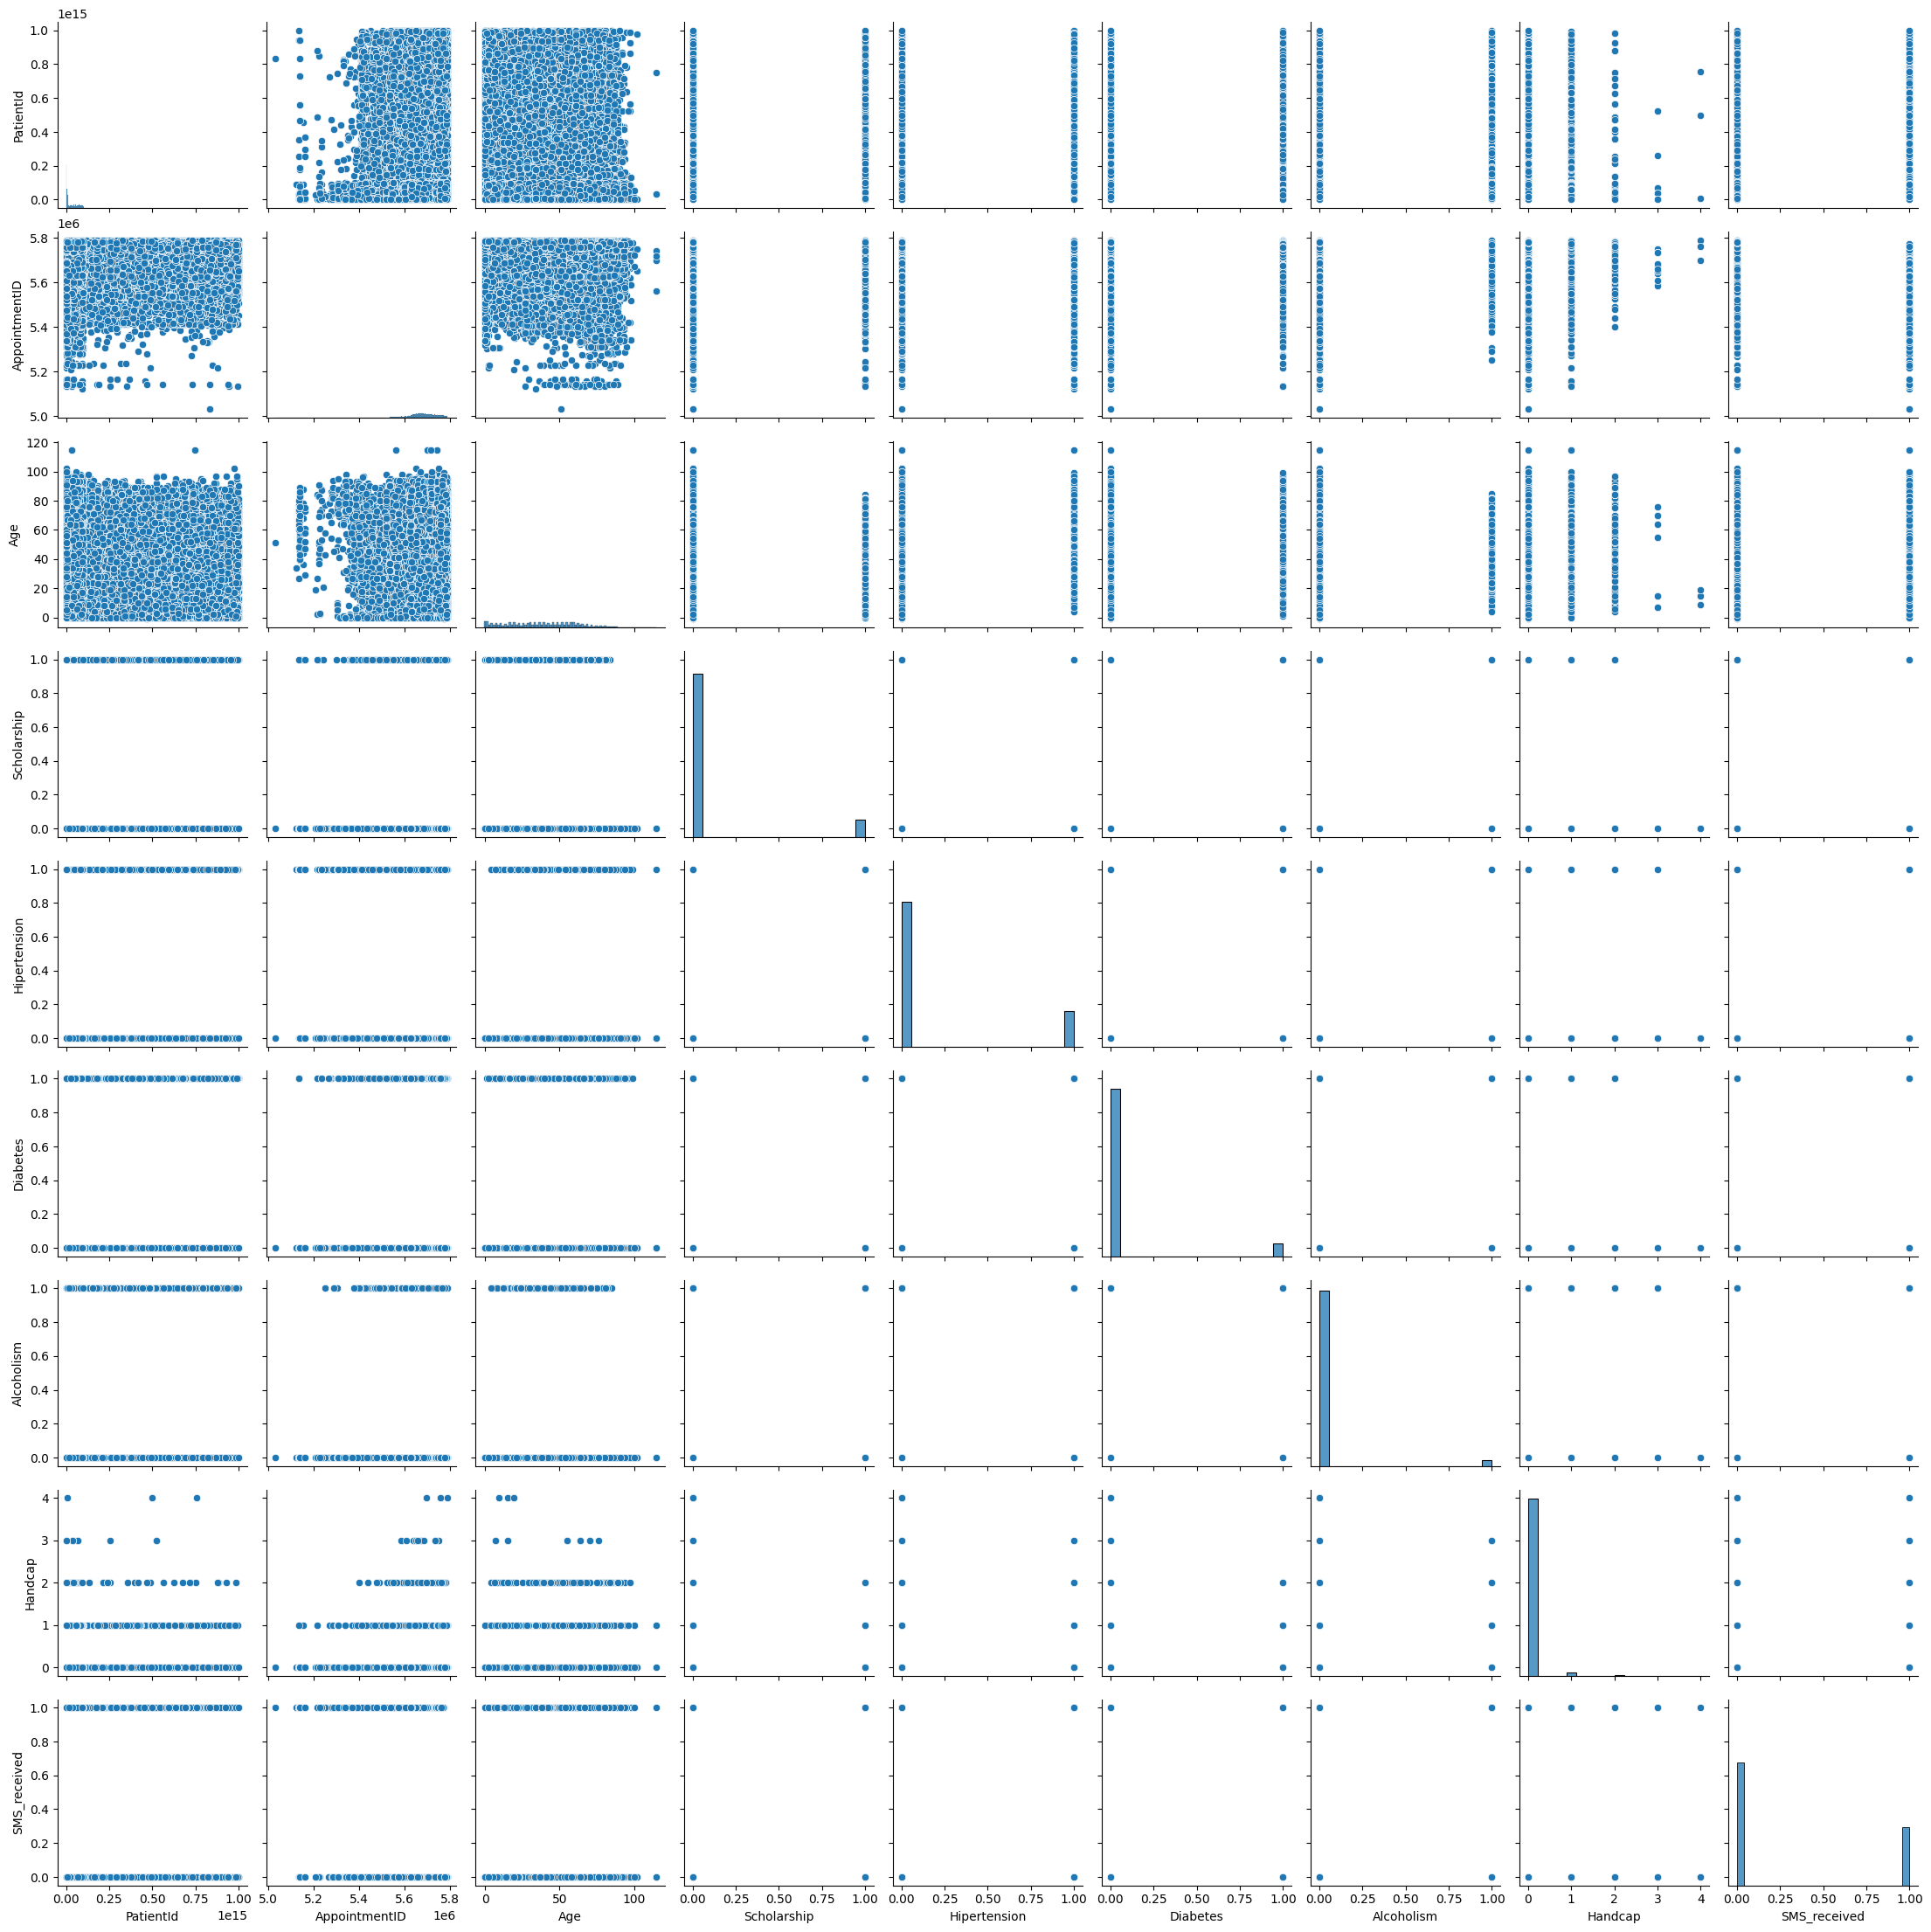

In [9]:
sns.pairplot(df)
plt.show()

In [6]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

## Dataset
-source:[ https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv]
- Contains information on 30000+ no-show, including schduling date, appointment id and more.

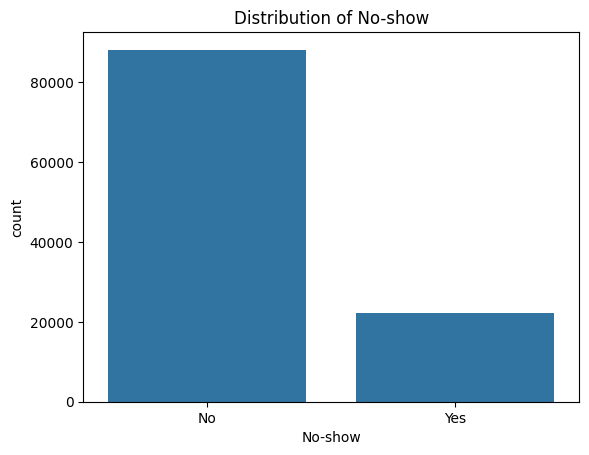

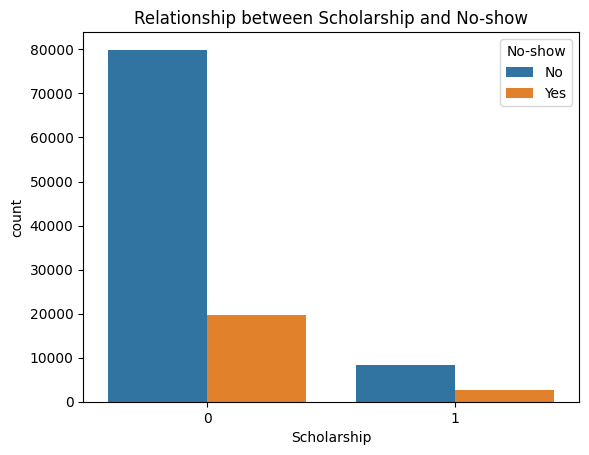

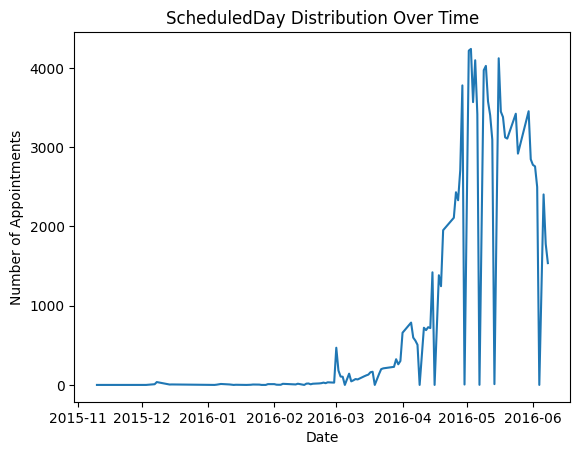

In [8]:
# Data Visualization
# Visualize the distribution of the target variable ('No-show')
sns.countplot(x='No-show', data=df)
plt.title('Distribution of No-show')
plt.show()

# Visualize the relationship between 'Scholarship' and 'No-show'
sns.countplot(x='Scholarship', hue='No-show', data=df)
plt.title('Relationship between Scholarship and No-show')
plt.show()

# Visualize the distribution of 'ScheduledDay'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('ScheduledDay Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.show()

In [10]:
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Missing Values:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Summary Statistics:
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism      

The dataset has 110527 medical appointments samples of 62298 patients. Judging from the statistics, there is a great possibility that each patient is likely to have multiple appointment records in the dataset. The data gotten further shows that the number of times a patient is given appointments correlates positively to the number of times he is present for the appointment, which draws a conclusion that patients showed up approximately 80% and failed to show up 20% of the times they were given appointments.

From the statistical findings, More appointments were fixed on Wednesdays while Saturdays were the least. Also, appointments were fixed more during the weekdays than the weekends.Considering this statistics; it will be best to fix appointment dates during the weekdays than weekends.

From the statistical findings, 67.90%(75044) did not receive sms while 32.10%(35482) received sms. This statistics shows that sms_distribution will greatly affect the number of patients that will show up on their appointment date, as a greater majority did not receive sms which is very capable of affecting the number of patients that will show up.